Stats descriptives des bases de données pour une première analyse

1) Importation des bases que l'on va utiliser

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from adjustText import adjust_text #à importer dans le terminal avec pip install

# Importer 3 bases CSV
df_voit = pd.read_csv("../Bases/q_voitvul_public_V3.csv", delimiter=";",encoding="ISO-8859-1", na_values=[""], low_memory=False)  # Modifie le délimiteur si nécessaire
df_tcmmen = pd.read_csv("../Bases/tcm_men_public_V3.csv", delimiter=",",encoding="ISO-8859-1", na_values=[""], low_memory=False)  # Modifie le délimiteur si nécessaire
df_men = pd.read_csv("../Bases/q_menage_public_V3.csv", delimiter=";",encoding="ISO-8859-1", na_values=[""], low_memory=False)  # Modifie le délimiteur si nécessaire


2. Analyse des bases chargées  
2.1 Analyse de la base VoitVul : 

In [4]:
#Affiche table voiturevul
print(df_voit.head())  # Affiche les 5 premières lignes

      IDENT_NUMVEH      IDENT_MEN  NUM_VEH     pond_veh  KVROUL  \
0  110000011400001  1100000114000        1  1842.977077       1   
1  110000011500001  1100000115000        1  1948.382441       1   
2  110000011500002  1100000115000        2  1948.382441       1   
3  110000011600001  1100000116000        1   833.453670       1   
4  110000012400001  1100000124000        1  1698.142782       1   

   cylindree_fin energie_fin  energie_agrege hybride  energie_statinfo  ...  \
0            1.6          ES             1.0     NaN               2.0  ...   
1            1.6          GO             2.0     NaN               4.0  ...   
2            1.4          ES             1.0     NaN               2.0  ...   
3            1.6          ES             1.0     NaN               2.0  ...   
4            1.5          GO             2.0     NaN               4.0  ...   

   KVKMVT      KVKM1ANV  indic_km_annu_corr KVKM1ANVT  KVCONS KVGAREJOUR  \
0     4.0   2478.916193             INTERPO   

In [5]:
#Convertir les variables identifiants voitures et ménages en string
df_voit[["IDENT_NUMVEH", "IDENT_MEN"]] = df_voit[["IDENT_NUMVEH", "IDENT_MEN"]].astype(str)
#Création de nouvelles variables energies 
df_voit["energie_groupe"] = df_voit["energie_statinfo"].apply(lambda x: 
                                           "VT" if x in [2, 3, 4, 5] else 
                                           "VE" if x == 1  else 
                                           "VHR" if x == 6 else 
                                           "Autres")

df_voit["energie_cartegrise"] = df_voit["energie_fin"].apply(lambda x: 
                                           "Gazole" if x  in ["GH","GO"] else 
                                           "Essence" if x in ["EH","ES"]  else 
                                           "VHR" if x =="EE" else 
                                           "VE" if x == "EL" else
                                           "Autres")
#Création d'une variable véhicule pro/perso : 
df_voit["Pro_Perso"] = df_voit["KVAQUIV"].apply(lambda x:
                                            "Pro" if x in [4,5] else
                                            "Perso")

print(df_voit.columns) #permet d'avoir le nom des variables

Index(['IDENT_NUMVEH', 'IDENT_MEN', 'NUM_VEH', 'pond_veh', 'KVROUL',
       'cylindree_fin', 'energie_fin', 'energie_agrege', 'hybride',
       'energie_statinfo', 'energie_CritAir', 'critair', 'puis_fisc_fin',
       'ANNEE_1mec', 'age', 'ANNEE_acq', 'dur_acq', 'KVAQUIV', 'KVAQUINO01',
       'KVAQUINO02', 'KVAQUINO03', 'KVAQUINO04', 'KVAQUINO05', 'KVAQUINO06',
       'KVAQUINO07', 'KVAQUINO08', 'KVAQUINO09', 'KVAQUINO10', 'KVAQUINO11',
       'KVAQUINO12', 'KVAQUINO13', 'KVAQUINO14', 'KVAQUINO15', 'KVAQUINO16',
       'KVAQUINO17', 'KVAQUINO18', 'KVAQUINO19', 'KVAQUINO20', 'KVAQUINO21',
       'KVQUICONV01', 'KVQUICONV02', 'KVQUICONV03', 'KVQUICONV04',
       'KVQUICONV05', 'KVQUICONV06', 'KVQUICONV07', 'KVQUICONV08',
       'KVQUICONV09', 'KVQUICONV10', 'KVQUICONV11', 'KVQUICONV12',
       'KVQUICONV13', 'KVQUICONV14', 'KVQUICONV15', 'KVQUICONV16',
       'KVQUICONV17', 'KVQUICONV18', 'KVQUICONV19', 'KVQUICONV20',
       'KVQUICONV21', 'KVQUI9COV', 'KVQUICONPV', 'KVKMV', 'indic_km_c

In [6]:
df_voit["cylindree_fin"].value_counts(sort=True)

cylindree_fin
1.6      3180
2.0      2195
1.5      2118
1.4      1689
1.2      1517
999.0    1393
1.9      1086
1.1       906
0.0       786
1.0       650
1.8       356
2.2       340
0.9       231
3.0       228
1.7       204
2.5       194
2.1       182
1.3       173
2.3        94
2.4        59
5.0        59
2.8        51
998.0      49
2.7        42
4.0        34
3.2        31
6.0        29
7.0        25
2.9        22
0.8        14
3.6        10
0.1         9
3.4         9
3.5         8
0.6         8
8.0         7
0.5         7
4.2         6
0.4         6
3.8         6
0.2         5
4.5         4
0.7         3
3.3         3
4.4         3
4.3         2
4.1         2
9.0         2
4.8         2
3.1         1
5.9         1
4.6         1
6.2         1
4.7         1
3.7         1
5.7         1
5.8         1
Name: count, dtype: int64

In [59]:
df_voit["energie_groupe"].value_counts()

energie_groupe
VT        16722
Autres     2044
VE           30
VHR          21
Name: count, dtype: int64

In [7]:
# Remplacer les valeurs aberrantes au-dessus d'un certain seuil par NaN
seuil=20
df_voit['cylindree_fin']=  df_voit['cylindree_fin'].mask(df_voit['cylindree_fin'] > seuil, np.nan)

print(df_voit['cylindree_fin'].describe())

count    16605.000000
mean         1.576411
std          0.671947
min          0.000000
25%          1.300000
50%          1.600000
75%          1.900000
max          9.000000
Name: cylindree_fin, dtype: float64


In [8]:
print(df_voit['cylindree_fin'].isna().value_counts())
#il y a 2212 observations dans la colonne 'cylindree_fin' qui ont été changée en NA

cylindree_fin
False    16605
True      2212
Name: count, dtype: int64


In [9]:
df_voit['KVCONS'].describe()

count    18642.000000
mean      2309.270191
std       4208.130321
min          0.000000
25%          5.800000
50%          7.000000
75%         10.500000
max       9999.000000
Name: KVCONS, dtype: float64

In [10]:
# Remplacer les valeurs aberrantes au-dessus d'un certain seuil par NaN
seuil=200
df_voit['KVCONS']=  df_voit['KVCONS'].mask(df_voit['KVCONS'] > seuil, np.nan)
print(df_voit['KVCONS'].describe())


count    14346.000000
mean         6.533940
std          2.468597
min          0.000000
25%          5.500000
50%          6.000000
75%          7.000000
max         84.000000
Name: KVCONS, dtype: float64


In [11]:
print(df_voit['KVCONS'].isna().value_counts())
#il y a 4471 observations dans la colonne 'KVCONS' qui ont été changée en NA

KVCONS
False    14346
True      4471
Name: count, dtype: int64


In [12]:
df_voit["Pro_Perso"].value_counts()


Pro_Perso
Perso    18449
Pro        368
Name: count, dtype: int64

In [13]:
#Statistiques sur les variables quantitatives KM sur les 12 derniers mois et la conso au 100 km
#df_voit_filtered_stat = df_voit[df_voit["KVCONS"] != np.nan]  
df_voit_filtered_stat = df_voit.dropna(subset=['KVCONS'])# Exclure les Nan

stats_filtered = df_voit_filtered_stat[["KVKM1ANV","KVCONS"]].rename(
    columns={"KVKM1ANV": "Km12derniersmois", "KVCONS": "Conso100KM"}
).describe(percentiles=[0.01, 0.25, 0.5, 0.75, 0.99])

print(stats_filtered)


       Km12derniersmois    Conso100KM
count      14319.000000  14346.000000
mean       11657.561339      6.533940
std         8103.898945      2.468597
min            0.000000      0.000000
1%           396.755928      3.800000
25%         6164.955680      5.500000
50%        10925.837635      6.000000
75%        15907.978735      7.000000
99%        35000.000000     12.000000
max       151260.830720     84.000000


In [14]:
print(df_voit_filtered_stat['KVCONS'].isna().value_counts())
#il y a 2212 observations dans la colonne 'cylindree_fin' qui ont été changée en NA

KVCONS
False    14346
Name: count, dtype: int64


Statistiques sur les variables qualitatives pour voir comment la structure et le type d'individu de la base


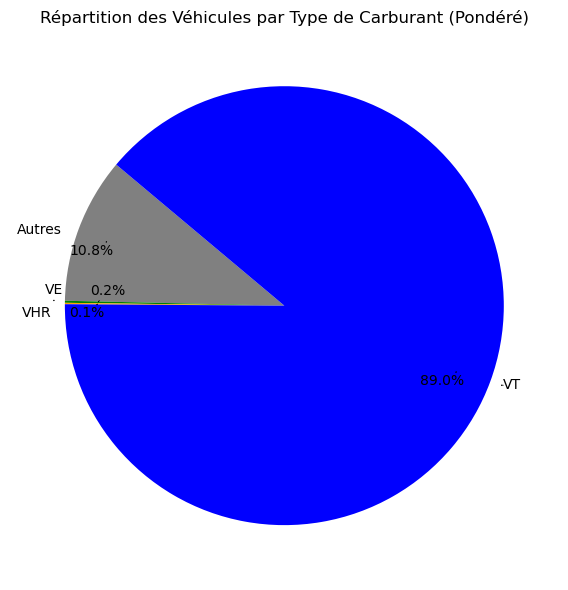

In [15]:
# Définition des couleurs
couleurs = {
    "VHR": "orange",   
    "VT": "blue",    
    "VE": "green",    
    "Autres": "grey"  
}

# Compter les effectifs pondérés
frequences_ponderees = df_voit.groupby("energie_groupe")["pond_veh"].sum()

# Création du graphique
plt.figure(figsize=(8, 6))
wedges, texts, autotexts = plt.pie(
    frequences_ponderees, 
    colors=[couleurs[c] for c in frequences_ponderees.index],
    labels=frequences_ponderees.index, 
    autopct='%1.1f%%',  # Affiche tous les % 
    startangle=140, 
    pctdistance=0.85,  # Éloigne les % du centre
    labeldistance=1.05,  # Éloigne les labels 
)

# Ajustement des textes pour éviter le chevauchement
texts.extend(autotexts)  # Inclure les labels et pourcentages
adjust_text(texts, only_move={'points': 'y', 'text': 'y'}, arrowprops=dict(arrowstyle="->", color='black', lw=0.5))

plt.title("Répartition des Véhicules par Type de Carburant (Pondéré)")
plt.tight_layout()
plt.show()


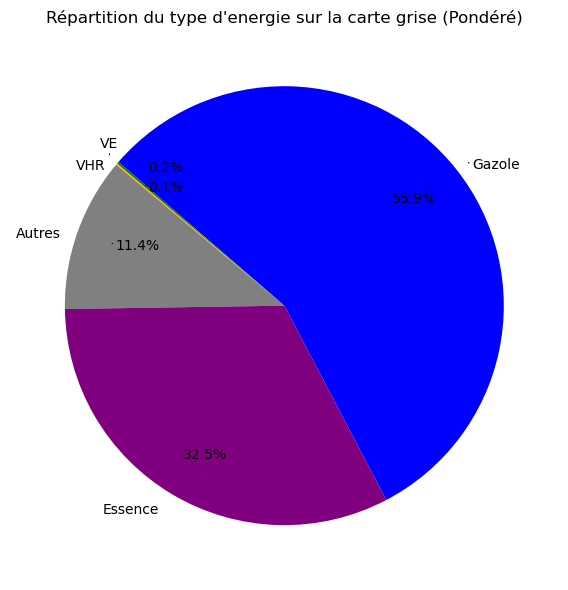

In [16]:
# Définition des couleurs
couleurs = {
    "VHR": "orange",    
    "Gazole": "blue",    
    "Essence": "purple", 
    "VE": "green",    
    "Autres": "grey" 
}

# Compter les effectifs pondérés
frequences_ponderees = df_voit.groupby("energie_cartegrise")["pond_veh"].sum()

# Création du graphique
plt.figure(figsize=(8, 6))
wedges, texts, autotexts = plt.pie(
    frequences_ponderees, 
    colors=[couleurs[c] for c in frequences_ponderees.index],
    labels=frequences_ponderees.index, 
    autopct='%1.1f%%',  # Affiche tous les % 
    startangle=140, 
    pctdistance=0.85,  # Éloigne les % du centre
    labeldistance=1.05,  # Éloigne les labels 
)

# Ajustement des textes pour éviter le chevauchement
texts.extend(autotexts)  # Inclure les labels et pourcentages
adjust_text(texts, only_move={'points': 'y', 'text': 'y'}, arrowprops=dict(arrowstyle="->", color='black', lw=0.5))

plt.title("Répartition du type d'energie sur la carte grise (Pondéré)")
plt.tight_layout()
plt.show()

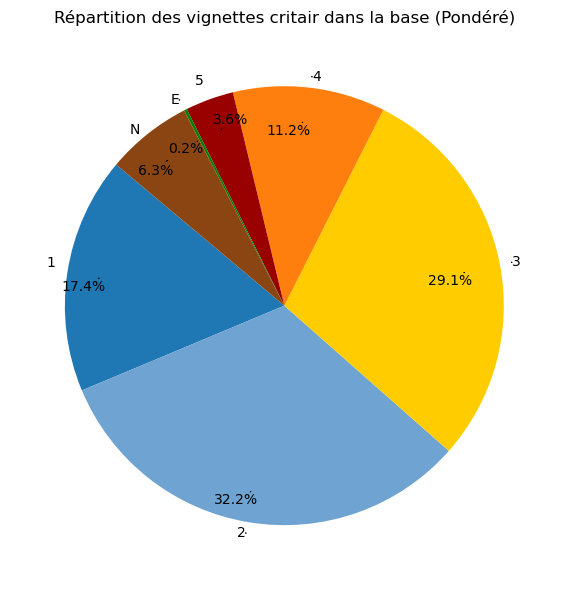

In [17]:
couleurs_critair = {
    "E": "green",   # Vert pour Électrique
    "1": "#1f77b4",   # Bleu (Crit'Air 1)
    "2": "#6fa3d1",   # Bleu clair (Crit'Air 2)
    "3": "#ffcc00",   # Jaune (Crit'Air 3)
    "4": "#ff7f0e",   # Orange (Crit'Air 4)
    "5": "#990000",   # Rouge foncé (Crit'Air 5)
    "N": "#8B4513"    # Marron (Non classé)
}

# Compter les fréquences de chaque crit'air
frequences_ponderees = df_voit.groupby("critair")["pond_veh"].sum()
frequences_ponderees = frequences_ponderees.sort_index()

# Création du graphique
plt.figure(figsize=(8, 6))
wedges, texts, autotexts = plt.pie(
    frequences_ponderees, 
    colors=[couleurs_critair[c] for c in frequences_ponderees.index],
    labels=frequences_ponderees.index, 
    autopct='%1.1f%%',  # Affiche tous les % 
    startangle=140, 
    pctdistance=0.85,  # Éloigne les % du centre
    labeldistance=1.05,  # Éloigne les labels 
)

# Ajustement des textes pour éviter le chevauchement
texts.extend(autotexts)  # Inclure les labels et pourcentages
adjust_text(texts, only_move={'points': 'y', 'text': 'y'}, arrowprops=dict(arrowstyle="->", color='black', lw=0.5))

plt.title("Répartition des vignettes critair dans la base (Pondéré)")
plt.tight_layout()
plt.show()

Après avoir présenter les caractéristiques générales des véhicules, on veut essayer de relier le kilométrage avec les caractéristiques des vehicules (energie, critair, cartegrise...)

In [18]:
#Stats descriptives du km annuel selon le carburant du vehicule
stats_km_quantiles = df_voit.groupby("energie_groupe")["KVKM1ANV"].agg(['count', 'mean', 'std', 'min', 
                                                            lambda x: x.quantile(0.01), 
                                                            'median', 
                                                            lambda x: x.quantile(0.99), 
                                                            'max'])

# Renommer les colonnes pour plus de clarté
stats_km_quantiles.columns = ['count', 'mean', 'std', 'min', '1%', 'median', '99%', 'max']

print(stats_km_quantiles)


                count          mean          std          min           1%  \
energie_groupe                                                               
Autres           1710  10150.962422  9057.512830     0.000000   152.700000   
VE                 30   8261.050310  2466.703777  1044.859917  1602.203829   
VHR                21  14441.080114  6819.677767  1316.105769  2295.784615   
VT              16711  11376.966409  8015.989859     0.000000   379.905466   

                      median           99%            max  
energie_groupe                                             
Autres           8000.000000  45000.000000   65000.000000  
VE               9423.828432  11363.060367   12000.000000  
VHR             15920.021346  29093.155157   29321.666667  
VT              10644.418605  33616.795899  151260.830720  


In [19]:
import numpy as np

def weighted_mean(x, weights):
    """Moyenne pondérée en ignorant les NaN"""
    mask = ~np.isnan(x)
    return np.average(x[mask], weights=weights[mask]) if np.any(mask) else np.nan

def weighted_std(x, weights):
    """Écart-type pondéré"""
    mask = ~np.isnan(x)
    if np.any(mask):
        avg = np.average(x[mask], weights=weights[mask])
        variance = np.average((x[mask] - avg) ** 2, weights=weights[mask])
        return np.sqrt(variance)
    return np.nan

def weighted_quantile(x, weights, quantile):
    """Quantile pondéré"""
    mask = ~np.isnan(x)
    x, weights = x[mask], weights[mask]
    if len(x) == 0:
        return np.nan
    sorted_indices = np.argsort(x)
    x_sorted, weights_sorted = x[sorted_indices], weights[sorted_indices]
    cumulative_weights = np.cumsum(weights_sorted) / np.sum(weights_sorted)
    return x_sorted[np.searchsorted(cumulative_weights, quantile)]

# Exclure les NaN avant l'agrégation
df_filtered = df_voit.dropna(subset=["KVKM1ANV"])

# Calcul des statistiques pondérées par énergie
stats_km_pond = df_filtered.groupby("energie_groupe").apply(lambda g: pd.Series({
    'count': len(g),  
    'mean': weighted_mean(g["KVKM1ANV"].values, g["pond_veh"].values),
    'std': weighted_std(g["KVKM1ANV"].values, g["pond_veh"].values),
    'min': np.min(g["KVKM1ANV"].values),
    '1%': weighted_quantile(g["KVKM1ANV"].values, g["pond_veh"].values, 0.01),
    'median': weighted_quantile(g["KVKM1ANV"].values, g["pond_veh"].values, 0.50),
    '99%': weighted_quantile(g["KVKM1ANV"].values, g["pond_veh"].values, 0.99),
    'max': np.max(g["KVKM1ANV"].values)
}))

print(stats_km_pond)


                  count          mean          std          min           1%  \
energie_groupe                                                                 
Autres           1710.0   9971.705140  9145.881597     0.000000   150.000000   
VE                 30.0   7940.334665  2832.607984  1044.859917  1044.859917   
VHR                21.0  14513.749243  6431.139293  1316.105769  1316.105769   
VT              16711.0  11361.820558  7998.503476     0.000000   379.504170   

                      median           99%            max  
energie_groupe                                             
Autres           8000.000000  50000.000000   65000.000000  
VE               9423.828432  12000.000000   12000.000000  
VHR             15920.021346  29321.666667   29321.666667  
VT              10624.365172  34338.467967  151260.830720  


/tmp/ipykernel_4853/1477030897.py:32: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  stats_km_pond = df_filtered.groupby("energie_groupe").apply(lambda g: pd.Series({


In [20]:
import numpy as np

def weighted_mean(x, weights):
    """Moyenne pondérée en ignorant les NaN"""
    mask = ~np.isnan(x)
    return np.average(x[mask], weights=weights[mask]) if np.any(mask) else np.nan

def weighted_std(x, weights):
    """Écart-type pondéré"""
    mask = ~np.isnan(x)
    if np.any(mask):
        avg = np.average(x[mask], weights=weights[mask])
        variance = np.average((x[mask] - avg) ** 2, weights=weights[mask])
        return np.sqrt(variance)
    return np.nan

def weighted_quantile(x, weights, quantile):
    """Quantile pondéré"""
    mask = ~np.isnan(x)
    x, weights = x[mask], weights[mask]
    if len(x) == 0:
        return np.nan
    sorted_indices = np.argsort(x)
    x_sorted, weights_sorted = x[sorted_indices], weights[sorted_indices]
    cumulative_weights = np.cumsum(weights_sorted) / np.sum(weights_sorted)
    return x_sorted[np.searchsorted(cumulative_weights, quantile)]

# Exclure les NaN avant l'agrégation
df_filtered = df_voit.dropna(subset=["KVKM1ANV"])

# Calcul des statistiques pondérées par énergie
stats_km_pond = df_filtered.groupby("critair").apply(lambda g: pd.Series({
    'count': len(g),  
    'mean': weighted_mean(g["KVKM1ANV"].values, g["pond_veh"].values),
    'std': weighted_std(g["KVKM1ANV"].values, g["pond_veh"].values),
    'min': np.min(g["KVKM1ANV"].values),
    '1%': weighted_quantile(g["KVKM1ANV"].values, g["pond_veh"].values, 0.01),
    'median': weighted_quantile(g["KVKM1ANV"].values, g["pond_veh"].values, 0.50),
    '99%': weighted_quantile(g["KVKM1ANV"].values, g["pond_veh"].values, 0.99),
    'max': np.max(g["KVKM1ANV"].values)
}))

print(stats_km_pond)
stats_km_pond.to_csv("/home/onyxia/work/Statapp/Bases/stats_km_pond.csv", index="True")


          count          mean          std         min          1%  \
critair                                                              
1        3044.0  10046.158456  6061.342129   41.671252  687.982981   
2        5822.0  14547.724925  8364.035501    0.476185  856.861284   
3        5145.0  10525.572470  7513.850144    5.000000  453.751562   
4        2015.0  10059.248384  8498.151984   10.000000  547.948786   
5         652.0   8322.189375  5957.181352    4.874301  200.000000   
E          39.0   7407.792079  3208.967200  700.000000  700.000000   
N        1170.0   5690.699681  7957.707258    0.000000   31.935362   

               median           99%           max  
critair                                            
1        10983.476300  27215.379276  139779.40826  
2        14349.533279  39691.125058  112359.53988  
3         9312.742818  32523.605769  148756.78954  
4         8877.103175  30000.000000  151260.83072  
5         7473.173441  26801.668820   50000.00000  
E    

/tmp/ipykernel_4853/3639165549.py:32: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  stats_km_pond = df_filtered.groupby("critair").apply(lambda g: pd.Series({


    2.2 Analyse de la base tcm_men : 

In [21]:
#Affiche table tcm_menage
print(df_tcmmen.head())

       ident_men     ident_log  vague_enq  BS    pond_menC  NPERS  NCOUPLES  \
0  1100000114000  110000011400          1   0  1842.977077      1         0   
1  1100000115000  110000011500          1   0  1948.382441      4         1   
2  1100000116000  110000011600          1   0   833.453670      2         1   
3  1100000124000  110000012400          2   0  1698.142782      2         1   
4  1100000125000  110000012500          2   0  1994.633496      2         1   

   NENFANTS  NACTIFS  NENFACT  ...  pop_10min_pieton_train_res  \
0         0        0        0  ...                          80   
1         2        2        0  ...                          80   
2         0        0        0  ...                           0   
3         0        2        0  ...                          50   
4         0        1        0  ...                          50   

   pop_10min_voiture_tram_metro_res  pop_10min_voiture_train_res  \
0                                 0                         

In [22]:
#Convertir les variables identifiants voitures et ménages en string
df_tcmmen[["ident_log", "ident_men"]] = df_tcmmen[["ident_log", "ident_men"]].astype(str)


In [23]:
#Vérifier que la somme des pondérations des ménages vaut le nombre total de ménages en France
tot_pond_menC=df_tcmmen[["pond_menC"]].sum()
print(tot_pond_menC)

#Nombre moyen de personnes dans un ménage
moy_NPERS=df_tcmmen[["NPERS"]].mean()
print(moy_NPERS)


pond_menC    2.925310e+07
dtype: float64
NPERS    2.292007
dtype: float64


In [55]:
df_tcmmen.value_counts("DIPDETPR")

DIPDETPR
52.0    2196
71.0    1989
70.0    1101
32.0     957
51.0     910
42.0     787
60.0     712
22.0     578
44.0     560
43.0     496
45.0     413
14.0     387
34.0     358
21.0     354
15.0     307
53.0     236
24.0     235
31.0     218
12.0     187
35.0     177
17.0     154
16.0     125
11.0     123
23.0      82
13.0      79
36.0      70
41.0      13
33.0      13
Name: count, dtype: int64

In [24]:
#regroupement des modalités pour le niveau de diplôme

#afficher les modalités et leurs effectifs
df_tcmmen["DIPDETPR"].value_counts().sort_index()

#regroupement
df_tcmmen["DIPDETPR_REGROUPE"] = df_tcmmen["DIPDETPR"].apply(lambda x: 
                                           "BAC+5+" if x  in [11.0,12.0,13.0,14.0,15.0,16.0,17.0] else 
                                           "BAC+3_4" if x in [21.0,22.0,23.0,24.0]  else 
                                           "BAC+2" if x in [31.0,32.0,33.0,34.0,35.0,36.0] else 
                                           "BAC" if x in [41.0,42.0,43.0,44.0,45.0] else
                                           "CAP_BEP" if x in [51.0,52.0,53.0] else
                                           "BREVET" if x == 60.0 else
                                           "PRIMAIRE_OU_SANS_DIPLOME")

#afficher les nouvelles modalités et leurs effectifs
df_tcmmen["DIPDETPR_REGROUPE"].value_counts()
                                      


DIPDETPR_REGROUPE
CAP_BEP                     3342
PRIMAIRE_OU_SANS_DIPLOME    3098
BAC                         2269
BAC+2                       1793
BAC+5+                      1362
BAC+3_4                     1249
BREVET                       712
Name: count, dtype: int64

In [25]:
#Type de ménage au sens du TCM : "TYPMEN5",
#Diplôme le plus élevé de la PR (code regroupé) : "DIPDETPR",
#Catégorie socioprofessionnelle du ménage : "CSMEN",
#Département de résidence : "DEP_RES",
#Région de la commune de résidence : "REG_res"
#variables de localisation...

nom_col_quanti=["quartile_rev","decile_rev"]

for col in nom_col_quanti :
    print("Résumé statistique pour la variable", col)
    print(df_tcmmen[col].describe())
    
print(df_tcmmen["quartile_rev"].head())


Résumé statistique pour la variable quartile_rev
count    13825.000000
mean         2.612658
std          1.115079
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          4.000000
Name: quartile_rev, dtype: float64
Résumé statistique pour la variable decile_rev
count    13825.000000
mean         5.750741
std          2.872370
min          1.000000
25%          3.000000
50%          6.000000
75%          8.000000
max         10.000000
Name: decile_rev, dtype: float64
0    3
1    4
2    2
3    4
4    3
Name: quartile_rev, dtype: int64


In [26]:
#Type de ménage au sens du TCM : "TYPMEN5",
#Diplôme le plus élevé de la PR (code regroupé) : "DIPDETPR",
#Catégorie socioprofessionnelle du ménage : "CSMEN",
#Département de résidence : "DEP_RES",
#Région de la commune de résidence : "REG_res"
#Statut dans l'unité urbaine (banlieu, ville centre, etc.) : "STATUTCOM_UU_RES"
#Degré de densité : DENSITECOM_RES
#Distance à vol d'oiseau du domicile à la station la plus proche de métro : "dist_res_metro"
#Distance à vol d'oiseau du domicile à la station la plus proche de tramway : "dist_res_tram"
#Distance à vol d'oiseau du domicile à la gare la plus proche : "dist_res_train"
#Distance à vol d'oiseau du domicile à la gare TGV la plus proche : "dist_res_tgv"

#variables quantitatives
#Part de la population de la commune à moins de 10 min à pied d'une station de métro ou de : "trampop_10min_pieton_tram_metro_res"
#Idem pour station de train (TER, RER et grande ligne) : "pop_10min_pieton_train_res"
#Part de la population de la commune à moins de 10 min en voiture d'une station de métro ou de : "pop_10min_voiture_tram_metro_res"
#Idem pour station de train (TER, RER et grande ligne) : "pop_10min_voiture_train_res"

In [27]:
nom_col_quanti=["pop_10min_pieton_tram_metro_res",
"pop_10min_pieton_train_res",
"pop_10min_voiture_tram_metro_res",
"pop_10min_voiture_train_res"]

for col in nom_col_quanti :
    print("Résumé statistique pour la variable", col)
    print(df_tcmmen[col].describe(percentiles=[0.01, 0.25, 0.5, 0.75, 0.99]))


Résumé statistique pour la variable pop_10min_pieton_tram_metro_res
count    13825.000000
mean        13.696203
std         28.978965
min          0.000000
1%           0.000000
25%          0.000000
50%          0.000000
75%          0.000000
99%        100.000000
max        100.000000
Name: pop_10min_pieton_tram_metro_res, dtype: float64
Résumé statistique pour la variable pop_10min_pieton_train_res
count    13825.000000
mean        12.266908
std         17.671848
min          0.000000
1%           0.000000
25%          0.000000
50%          0.000000
75%         20.000000
99%         70.000000
max        100.000000
Name: pop_10min_pieton_train_res, dtype: float64
Résumé statistique pour la variable pop_10min_voiture_tram_metro_res
count    13825.000000
mean        30.286438
std         45.285445
min          0.000000
1%           0.000000
25%          0.000000
50%          0.000000
75%        100.000000
99%        100.000000
max        100.000000
Name: pop_10min_voiture_tram_metro_re

In [28]:
#Stats descriptives de la part de la population à moins de 10km des infrastructures de transport selon le statut dans l'unité urbaine 
for col in nom_col_quanti :
    stats_part_pop = df_tcmmen.groupby("STATUTCOM_UU_RES")[col].agg(['count', 'mean', 'std', 'min', 
                                                            lambda x: x.quantile(0.01), 
                                                            'median', 
                                                            lambda x: x.quantile(0.99), 
                                                            'max'])

    # Renommer les colonnes pour plus de clarté
    stats_part_pop.columns = ['count', 'mean', 'std', 'min', '1%', 'median', '99%', 'max']
    stats_part_pop.rename(index = {'B' : 'Banlieue', 'C' : 'Ville-centre', 'H' : 'Hors unité urbaine', 'I' : 'Ville isolée'}, inplace = True)
    print("Résumé stat de la variable", col, "selon le statut dans l'unité urbaine")
    print(stats_part_pop)         

Résumé stat de la variable pop_10min_pieton_tram_metro_res selon le statut dans l'unité urbaine
                    count       mean        std  min   1%  median    99%  max
STATUTCOM_UU_RES                                                             
Banlieue             4946  12.090578  24.865191    0  0.0     0.0   90.0  100
Ville-centre         4587  28.242860  38.402570    0  0.0     0.0  100.0  100
Hors unité urbaine   3314   0.000000   0.000000    0  0.0     0.0    0.0    0
Ville isolée          978   0.000000   0.000000    0  0.0     0.0    0.0    0
Résumé stat de la variable pop_10min_pieton_train_res selon le statut dans l'unité urbaine
                    count       mean        std  min   1%  median   99%  max
STATUTCOM_UU_RES                                                            
Banlieue             4946  15.564092  20.838229    0  0.0     0.0  70.0  100
Ville-centre         4587  17.856987  16.129073    0  0.0    10.0  70.0   90
Hors unité urbaine   3314   1.276403 

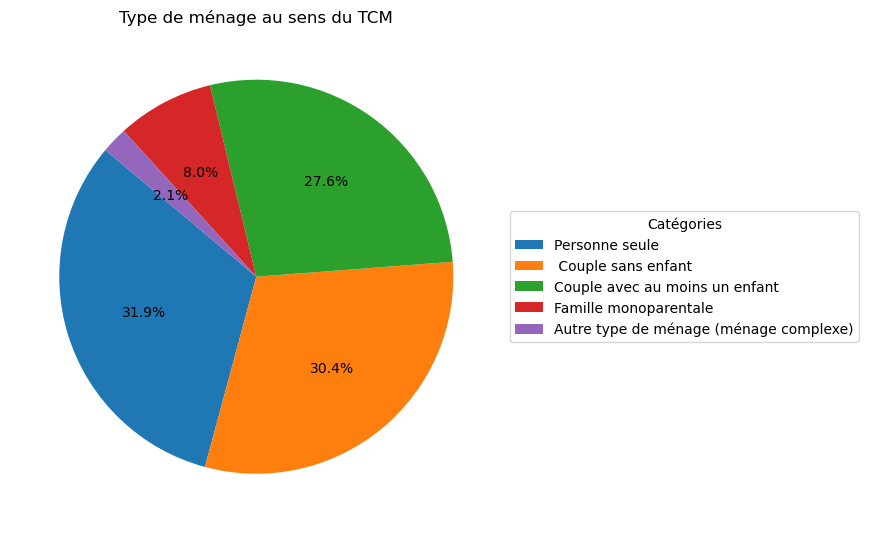

In [29]:
#Type de ménage au sens du TCM : "TYPMEN5",



# Compter les fréquences de chaque type d'énergie
frequences = df_tcmmen["TYPMEN5"].value_counts()

# Créer le camembert sans les étiquettes (labels)
plt.figure(figsize=(8, 6))
plt.pie(frequences, autopct='%1.1f%%', startangle=140)

# Ajouter la légende à côté
frequences.rename(index = {1 : 'Personne seule', 2 : 'Famille monoparentale ', 3 : ' Couple sans enfant', 4 : 'Couple avec au moins un enfant', 5 :'Autre type de ménage (ménage complexe)' }, inplace = True)
plt.legend(frequences.index, title="Catégories", loc="center left", bbox_to_anchor=(1, 0.5))
plt.title("Type de ménage au sens du TCM")
plt.tight_layout()  # Ajuste automatiquement l'espace pour éviter les chevauchements
plt.show()


/tmp/ipykernel_4853/3315400462.py:12: UserWarning: Glyph 146 (\x92) missing from font(s) DejaVu Sans.
  plt.tight_layout()  # Ajuste automatiquement l'espace pour éviter les chevauchements
/tmp/ipykernel_4853/3315400462.py:12: UserWarning: Glyph 151 (\x97) missing from font(s) DejaVu Sans.
  plt.tight_layout()  # Ajuste automatiquement l'espace pour éviter les chevauchements
/opt/conda/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 146 (\x92) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 151 (\x97) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


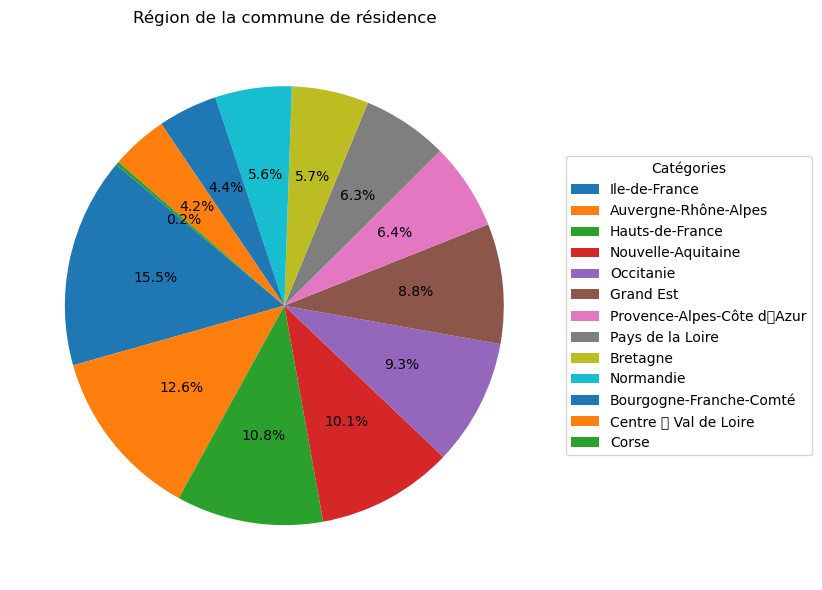

In [30]:
#Région de la commune de résidence : "REG_res"
frequences = df_tcmmen["REG_res"].value_counts()

# Créer le camembert sans les étiquettes (labels)
plt.figure(figsize=(8, 6))
plt.pie(frequences, autopct='%1.1f%%', startangle=140)

# Ajouter la légende à côté
plt.legend(frequences.index, title="Catégories", loc="center left", bbox_to_anchor=(1, 0.5))

plt.title("Région de la commune de résidence")
plt.tight_layout()  # Ajuste automatiquement l'espace pour éviter les chevauchements
plt.show()

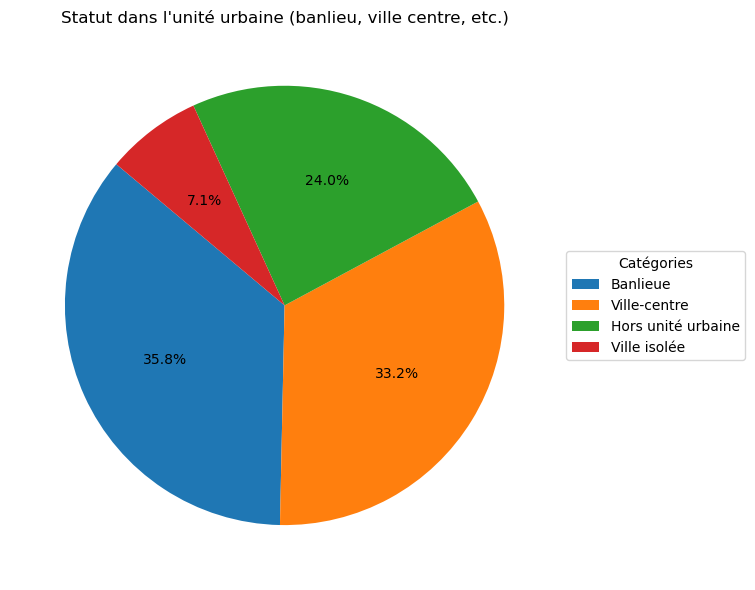

In [31]:
#Statut dans l'unité urbaine (banlieu, ville centre, etc.) : "STATUTCOM_UU_RES"
frequences = df_tcmmen["STATUTCOM_UU_RES"].value_counts()

# Créer le camembert sans les étiquettes (labels)
plt.figure(figsize=(8, 6))
plt.pie(frequences, autopct='%1.1f%%', startangle=140)

# Ajouter la légende à côté
frequences.rename(index = {'B' : 'Banlieue', 'C' : 'Ville-centre', 'H' : 'Hors unité urbaine', 'I' : 'Ville isolée'}, inplace = True)
plt.legend(frequences.index, title="Catégories", loc="center left", bbox_to_anchor=(1, 0.5))
plt.title("Statut dans l'unité urbaine (banlieu, ville centre, etc.)")
plt.tight_layout()  # Ajuste automatiquement l'espace pour éviter les chevauchements
plt.show()

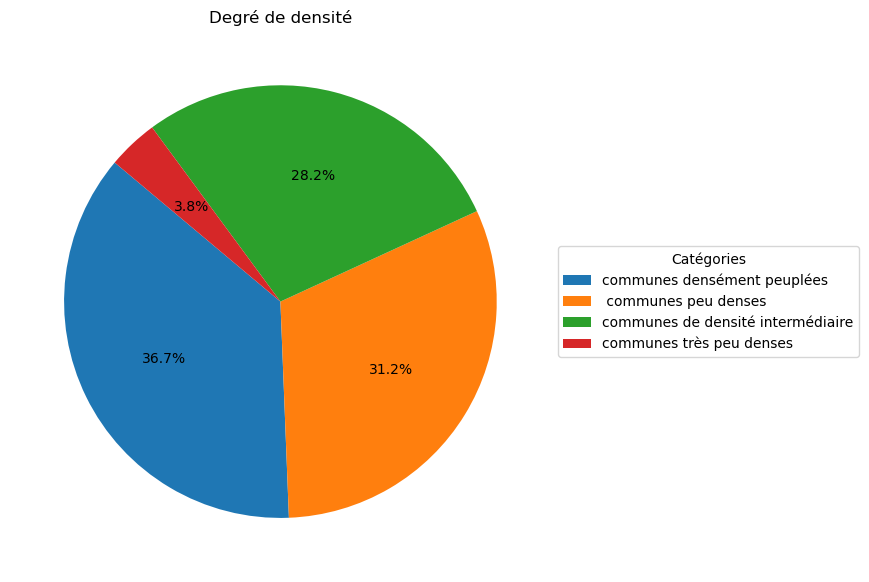

In [32]:
#Degré de densité : DENSITECOM_RES
frequences = df_tcmmen["DENSITECOM_RES"].value_counts()

# Créer le camembert sans les étiquettes (labels)
plt.figure(figsize=(8, 6))
plt.pie(frequences, autopct='%1.1f%%', startangle=140)

# Ajouter la légende à côté
frequences.rename(index = {1 : 'communes densément peuplées', 2 : 'communes de densité intermédiaire', 3 : ' communes peu denses', 4 : 'communes très peu denses'}, inplace = True)
plt.legend(frequences.index, title="Catégories", loc="center left", bbox_to_anchor=(1, 0.5))
plt.title("Degré de densité")
plt.tight_layout()  # Ajuste automatiquement l'espace pour éviter les chevauchements
plt.show()


    2.3 Analyse de la base men : 

In [33]:
#On affiche la base et on regarde les variables contenus par celle-ci

print(df_men.head())
print(df_men.columns)

#On passe la variable identifiant menage en str
df_men[["IDENT_MEN"]] = df_men[["IDENT_MEN"]].astype(str)

       IDENT_MEN    pond_menC  JNBVEH  JNBVHS  JNBVPHS  JNBCCHS  JNBVULHS  \
0  1100000114000  1842.977077       1     2.0      NaN      NaN       NaN   
1  1100000115000  1948.382441       2     2.0      NaN      NaN       NaN   
2  1100000116000   833.453670       1     2.0      NaN      NaN       NaN   
3  1100000124000  1698.142782       1     2.0      NaN      NaN       NaN   
4  1100000125000  1994.633496       2     2.0      NaN      NaN       NaN   

   JNBMOTO  JNBCYCLO  JNBAUTVEH  ...  JUTILMOTO  JUTILCYCLO  JUTILAUTVEH  \
0        0         0          0  ...        NaN         NaN          NaN   
1        0         0          0  ...        NaN         NaN          NaN   
2        0         0          0  ...        NaN         NaN          NaN   
3        2         0          0  ...        2.0         NaN          NaN   
4        0         0          0  ...        NaN         NaN          NaN   

   JUTILVELOAD  JUTILVELOENF  JVOLVELO  JPLUSVELO  JNBKVM  JUTIL2RM  BLOGDIST  


In [34]:
#Part de la population ayant une voiture


3. Fusion des bases voitvul et tcm_men pour expliquer le KM des voitures selon les caractéristiques des ménages

In [35]:
#Fusion des bases voitvul et tcmmen
df_fusion = pd.merge(df_voit, df_tcmmen, left_on="IDENT_MEN", right_on="ident_men", how="left")
df_fusion.head()


,IDENT_NUMVEH,IDENT_MEN,NUM_VEH,pond_veh,KVROUL,cylindree_fin,energie_fin,energie_agrege,hybride,energie_statinfo,...,pop_10min_voiture_tram_metro_res,pop_10min_voiture_train_res,classement_littoral_res,classement_montagne_res,densite_7_RES,dist_res_tram,dist_res_metro,dist_res_train,dist_res_tgv,DIPDETPR_REGROUPE
0,110000011400001,1100000114000,1,1842.977077,1,1.6,ES,1.0,NaN,2.0,...,0,100,Non concerné,Non concerné,Grands centres urbains,10km et plus,10km et plus,500m Ã moins de 1km,20km et plus,BAC+2
1,110000011500001,1100000115000,1,1948.382441,1,1.6,GO,2.0,NaN,4.0,...,0,100,Non concerné,Non concerné,Grands centres urbains,10km et plus,10km et plus,Moins de 500m,20km et plus,CAP_BEP
2,110000011500002,1100000115000,2,1948.382441,1,1.4,ES,1.0,NaN,2.0,...,0,100,Non concerné,Non concerné,Grands centres urbains,10km et plus,10km et plus,Moins de 500m,20km et plus,CAP_BEP
3,110000011600001,1100000116000,1,833.453670,1,1.6,ES,1.0,NaN,2.0,...,0,100,Non concerné,Non concerné,Rural Ã habitat dispersÃ©,10km et plus,10km et plus,1 Ã moins de 2km,10 Ã moins de 20km,CAP_BEP
4,110000012400001,1100000124000,1,1698.142782,1,1.5,GO,2.0,NaN,4.0,...,0,100,Non concerné,Non concerné,Grands centres urbains,10km et plus,10km et plus,500m Ã moins de 1km,20km et plus,BAC+5+


In [36]:
#Création d'une variable similaire à TYPMEN5 (poiur avoir des modalités plus parlantes)
df_fusion["NEWTYPMEN"] = df_fusion["TYPMEN5"].apply(lambda x: 
                                           "Personne seule" if x  == 1 else 
                                           "Famille monoparentale" if x == 2  else 
                                           "Couple sans enfant" if x == 3 else 
                                           "Couple avec au moins un enfant" if x == 4 else
                                           "Menage complexe")

In [37]:
df_fusion["energie_groupe"].value_counts()


energie_groupe
VT        16722
Autres     2044
VE           30
VHR          21
Name: count, dtype: int64

/tmp/ipykernel_4853/1789975752.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  kilometrage_moyen_par_region = df_fusion.groupby('REG_res').apply(
/tmp/ipykernel_4853/1789975752.py:26: UserWarning: Glyph 151 (\x97) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_4853/1789975752.py:26: UserWarning: Glyph 146 (\x92) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/opt/conda/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 151 (\x97) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 146 (\x92) missing from font(s) DejaVu 

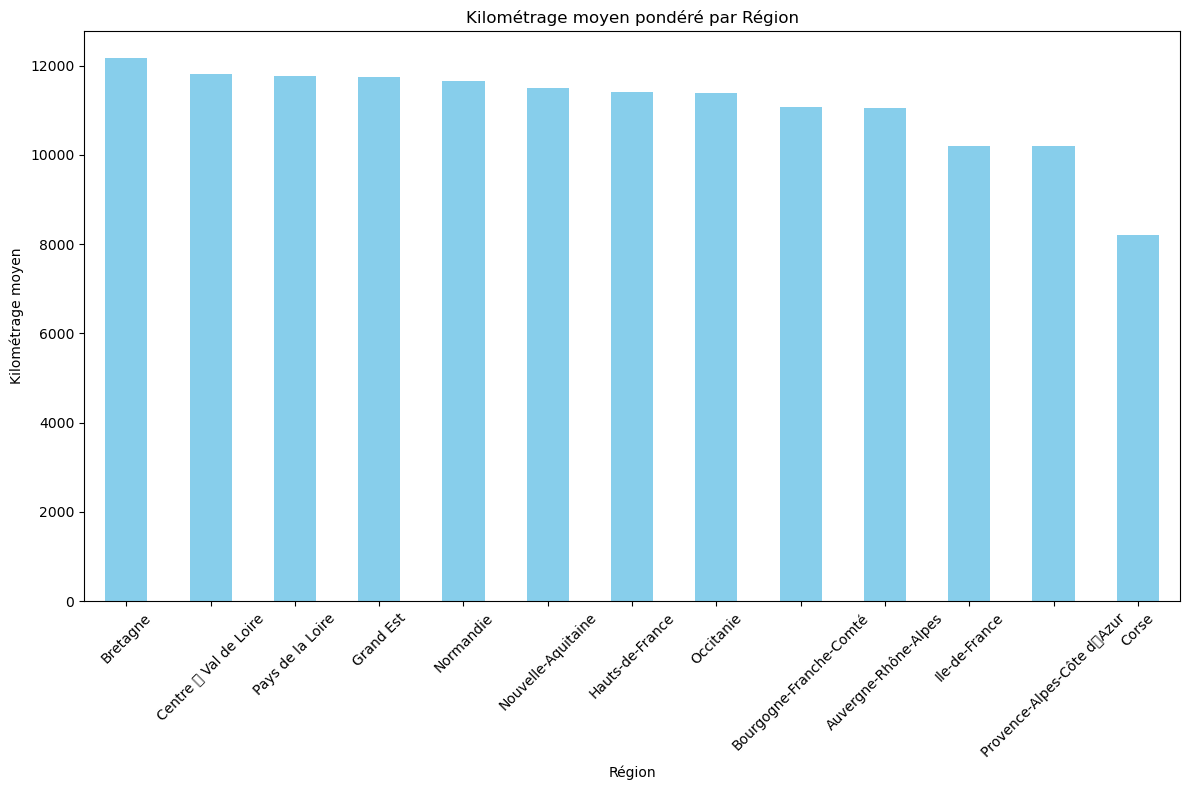

In [38]:

import pandas as pd
import matplotlib.pyplot as plt

# Supposons que df_fusion1 soit votre DataFrame

# Supprimer les valeurs manquantes
df_fusion = df_fusion.dropna(subset=['KVKM1ANV', 'REG_res', 'energie_groupe'])

# Conversion en types appropriés
df_fusion['KVKM1ANV'] = pd.to_numeric(df_fusion['KVKM1ANV'], errors='coerce')  # Assurer un type numérique
df_fusion['REG_res'] = df_fusion['REG_res'].astype(str)  # Convertir REG_res en texte
df_fusion['energie_groupe'] = df_fusion['energie_groupe'].astype(str)  # Convertir energie_groupe en texte

# Calculer le kilométrage moyen pondéré par région
kilometrage_moyen_par_region = df_fusion.groupby('REG_res').apply(
    lambda x: (x['KVKM1ANV'] * x['pond_veh']).sum() / x['pond_veh'].sum()
).sort_values(ascending=False)

# Tracer l'histogramme
plt.figure(figsize=(12, 8))
kilometrage_moyen_par_region.plot(kind='bar', color='skyblue')
plt.title('Kilométrage moyen pondéré par Région')
plt.ylabel('Kilométrage moyen')
plt.xlabel('Région')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/tmp/ipykernel_4853/1067016593.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  kilometrage_moyen_total = df_fusion.groupby('REG_res').apply(
/tmp/ipykernel_4853/1067016593.py:58: UserWarning: Glyph 151 (\x97) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_4853/1067016593.py:58: UserWarning: Glyph 146 (\x92) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/opt/conda/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 151 (\x97) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 146 (\x92) missing from font(s) DejaVu Sans.

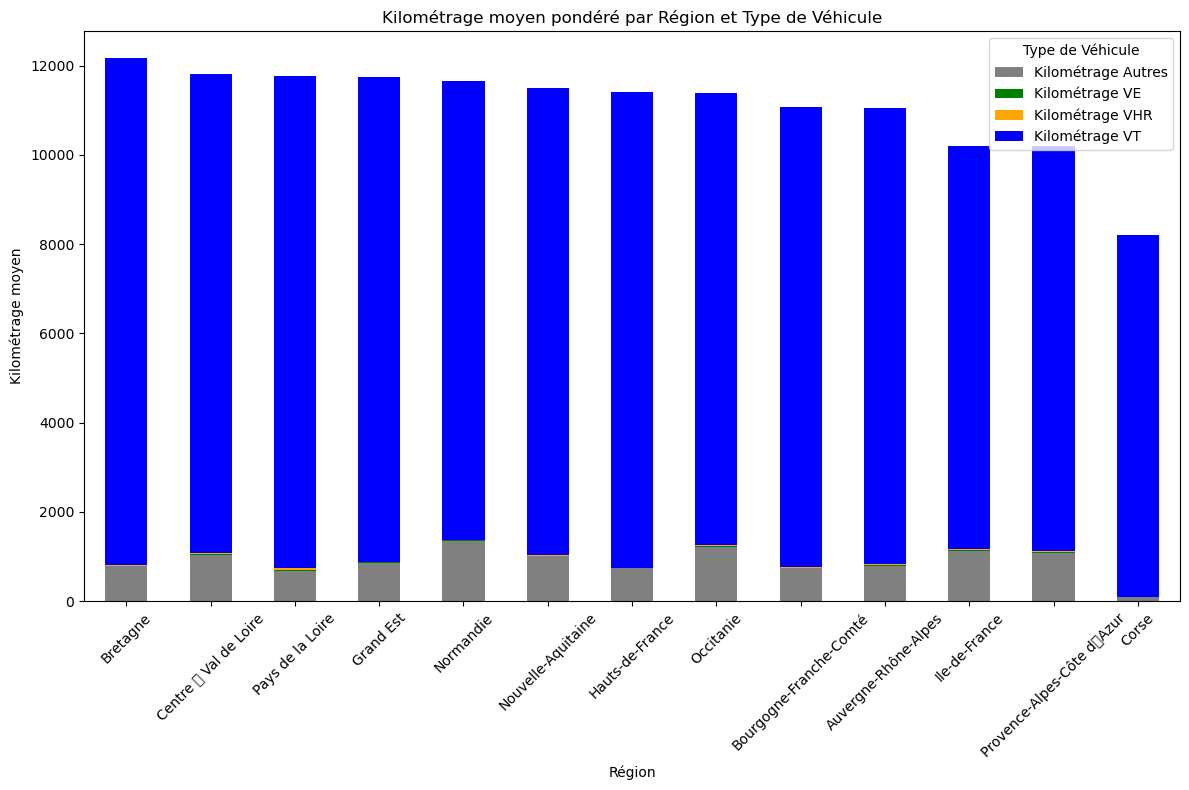

In [39]:

import pandas as pd
import matplotlib.pyplot as plt

# Supposons que df_fusion1 soit votre DataFrame

# Supprimer les valeurs manquantes
df_fusion = df_fusion.dropna(subset=['KVKM1ANV', 'REG_res', 'energie_groupe'])

# Conversion en types appropriés
df_fusion['KVKM1ANV'] = pd.to_numeric(df_fusion['KVKM1ANV'], errors='coerce')  # Assurer un type numérique
df_fusion['REG_res'] = df_fusion['REG_res'].astype(str)  # Convertir REG_res en texte
df_fusion['energie_groupe'] = df_fusion['energie_groupe'].astype(str)  # Convertir energie_groupe en texte

# Calculer le kilométrage moyen total par région
kilometrage_moyen_total = df_fusion.groupby('REG_res').apply(
    lambda x: (x['KVKM1ANV'] * x['pond_veh']).sum() / x['pond_veh'].sum()
)

# Calculer les sommes des kilométrages pour chaque type de véhicule
kilometrage_par_vehicule = df_fusion.groupby(['REG_res', 'energie_groupe'])['KVKM1ANV'].sum().unstack()

# Calculer les proportions pour chaque type de véhicule
proportion_par_vehicule = kilometrage_par_vehicule.div(kilometrage_par_vehicule.sum(axis=1), axis=0)

# Calculer les contributions au kilométrage moyen total
contribution_par_vehicule = proportion_par_vehicule.multiply(kilometrage_moyen_total, axis=0)

# Créer un DataFrame pour les résultats
resultats = pd.DataFrame({
    'Région': kilometrage_moyen_total.index,
    'Kilométrage Total': kilometrage_moyen_total
})

# Ajouter les contributions de chaque type de véhicule au DataFrame
for vehicule in contribution_par_vehicule.columns:
    resultats[f'Kilométrage {vehicule}'] = contribution_par_vehicule[vehicule]

# Trier les résultats par kilométrage total décroissant
resultats = resultats.sort_values(by='Kilométrage Total', ascending=False)

# Définir une palette de couleurs personnalisée
colors = {
    'VE': 'green',
    'VHR': 'orange',
    'VT': 'blue',
    'Autres': 'gray'
}

# Créer une liste de couleurs dans l'ordre des colonnes
plot_colors = [colors[vehicule] for vehicule in contribution_par_vehicule.columns if vehicule in colors]

# Tracer le graphique empilé avec les couleurs personnalisées
resultats.set_index('Région').drop(columns=['Kilométrage Total']).plot(kind='bar', stacked=True, figsize=(12, 8), color=plot_colors)
plt.title('Kilométrage moyen pondéré par Région et Type de Véhicule')
plt.ylabel('Kilométrage moyen')
plt.xticks(rotation=45)
plt.legend(title='Type de Véhicule')
plt.tight_layout()
plt.show()


/tmp/ipykernel_4853/1858339661.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  kilometrage_moyen_total = df_fusion.groupby('REG_res').apply(
/tmp/ipykernel_4853/1858339661.py:21: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  kilometrage_total_par_region = df_fusion.groupby('REG_res').apply(
/tmp/ipykernel_4853/1858339661.py:26: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns

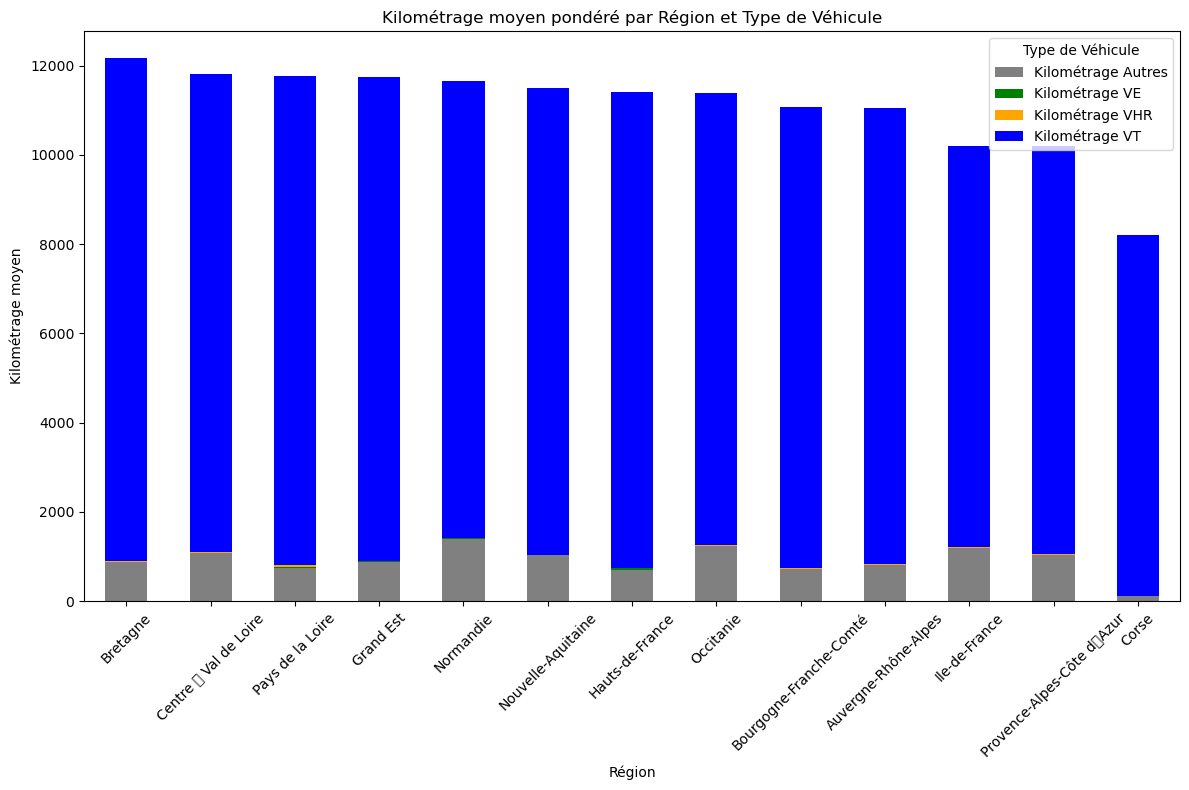

In [40]:

import pandas as pd
import matplotlib.pyplot as plt

# Supposons que df_fusion1 soit votre DataFrame

# Supprimer les valeurs manquantes
df_fusion = df_fusion.dropna(subset=['KVKM1ANV', 'REG_res', 'energie_groupe'])

# Conversion en types appropriés
df_fusion['KVKM1ANV'] = pd.to_numeric(df_fusion['KVKM1ANV'], errors='coerce')  # Assurer un type numérique
df_fusion['REG_res'] = df_fusion['REG_res'].astype(str)  # Convertir REG_res en texte
df_fusion['energie_groupe'] = df_fusion['energie_groupe'].astype(str)  # Convertir energie_groupe en texte

# Calculer le kilométrage moyen total par région
kilometrage_moyen_total = df_fusion.groupby('REG_res').apply(
    lambda x: (x['KVKM1ANV'] * x['pond_veh']).sum() / x['pond_veh'].sum()
)

 
# Calculer le kilométrage total pondéré par région
kilometrage_total_par_region = df_fusion.groupby('REG_res').apply(
    lambda x: (x['KVKM1ANV'] * x['pond_veh']).sum()
)

# Calculer le kilométrage pondéré par type de véhicule et par région
kilometrage_par_vehicule = df_fusion.groupby(['REG_res', 'energie_groupe']).apply(
    lambda x: (x['KVKM1ANV'] * x['pond_veh']).sum()
).unstack()

# Calculer les proportions pour chaque type de véhicule
proportion_par_vehicule = kilometrage_par_vehicule.div(kilometrage_total_par_region, axis=0)

 

# Calculer les contributions au kilométrage moyen total
contribution_par_vehicule = proportion_par_vehicule.multiply(kilometrage_moyen_total, axis=0)

# Créer un DataFrame pour les résultats
resultats = pd.DataFrame({
    'Région': kilometrage_moyen_total.index,
    'Kilométrage Total': kilometrage_moyen_total
})

# Ajouter les contributions de chaque type de véhicule au DataFrame
for vehicule in contribution_par_vehicule.columns:
    resultats[f'Kilométrage {vehicule}'] = contribution_par_vehicule[vehicule]

# Trier les résultats par kilométrage total décroissant
resultats = resultats.sort_values(by='Kilométrage Total', ascending=False)

# Définir une palette de couleurs personnalisée
colors = {
    'VE': 'green',
    'VHR': 'orange',
    'VT': 'blue',
    'Autres': 'gray'
}

# Créer une liste de couleurs dans l'ordre des colonnes
plot_colors = [colors[vehicule] for vehicule in contribution_par_vehicule.columns if vehicule in colors]

# Tracer le graphique empilé avec les couleurs personnalisées
resultats.set_index('Région').drop(columns=['Kilométrage Total']).plot(kind='bar', stacked=True, figsize=(12, 8), color=plot_colors)
plt.title('Kilométrage moyen pondéré par Région et Type de Véhicule')
plt.ylabel('Kilométrage moyen')
plt.xticks(rotation=45)
plt.legend(title='Type de Véhicule')
plt.tight_layout()
plt.show()


/tmp/ipykernel_4853/2338880144.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  kilometrage_moyen_total = df_fusion.groupby('REG_res').apply(
/tmp/ipykernel_4853/2338880144.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  kilometrage_moyen_par_vehicule = df_fusion.groupby(['REG_res', 'energie_groupe']).apply(
/opt/conda/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 15

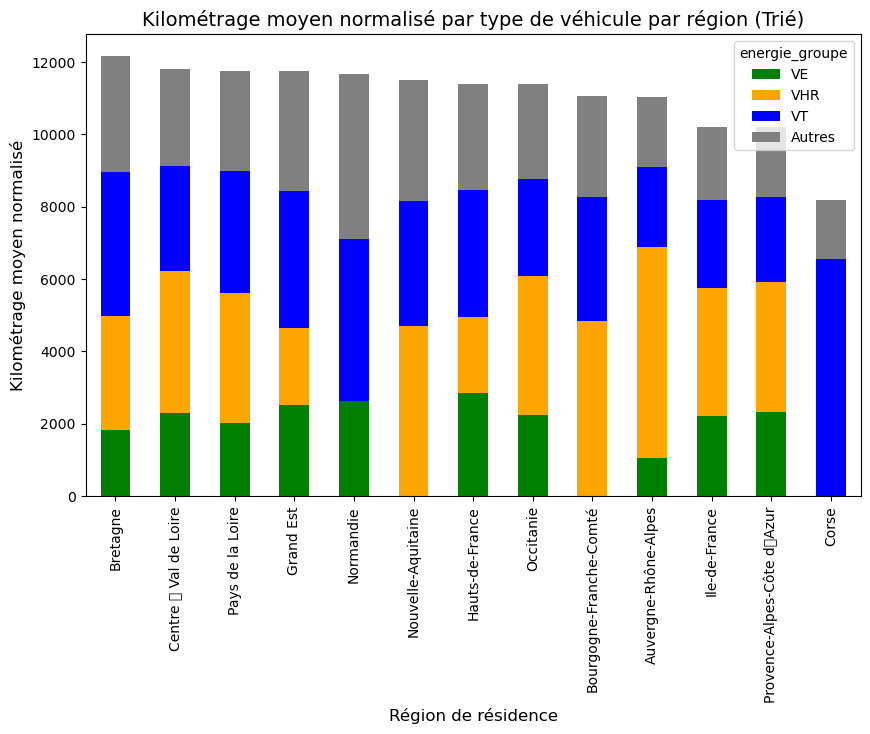

In [41]:

# 1. Calcul du kilométrage moyen total par région
kilometrage_moyen_total = df_fusion.groupby('REG_res').apply(
    lambda x: (x['KVKM1ANV'] * x['pond_veh']).sum() / x['pond_veh'].sum()
)

# 2. Calcul du kilométrage moyen par région et type de véhicule
kilometrage_moyen_par_vehicule = df_fusion.groupby(['REG_res', 'energie_groupe']).apply(
    lambda x: (x['KVKM1ANV'] * x['pond_veh']).sum() / x['pond_veh'].sum()
).unstack()

# 3. Normaliser les valeurs : pour chaque région, ajuster la somme des segments à la moyenne totale
for region in kilometrage_moyen_par_vehicule.index:
    total_region = kilometrage_moyen_total[region]  # Moyenne totale pour cette région
    region_data = kilometrage_moyen_par_vehicule.loc[region]
    normalized_data = (region_data / region_data.sum()) * total_region
    kilometrage_moyen_par_vehicule.loc[region] = normalized_data

# 4. Trier les régions par leur moyenne totale (en ordre décroissant)
sorted_regions = kilometrage_moyen_total.sort_values(ascending=False).index

# Réorganiser les données de kilometrage_moyen_par_vehicule pour suivre l'ordre trié des régions
kilometrage_moyen_par_vehicule_sorted = kilometrage_moyen_par_vehicule.loc[sorted_regions]

# 5. Spécifier les couleurs dynamiquement en fonction de l'ordre des types de véhicules
# L'ordre des colonnes peut être dans un autre ordre, donc je définis l'ordre manuellement ici.
column_order = ['VE', 'VHR', 'VT', 'Autres']  # L'ordre que vous voulez pour les couleurs

# Réorganiser les colonnes dans le bon ordre
kilometrage_moyen_par_vehicule_sorted = kilometrage_moyen_par_vehicule_sorted[column_order]

# Spécifier les couleurs pour chaque type de véhicule
colors = ['green', 'orange', 'blue', 'gray']  # VE (vert), VHR (orange), VT (bleu), Autres (gris)

# 6. Création de l'histogramme empilé normalisé avec les couleurs spécifiées
ax = kilometrage_moyen_par_vehicule_sorted.plot(kind='bar', stacked=True, figsize=(10, 6), color=colors)

# 7. Ajouter des titres et des étiquettes
plt.title('Kilométrage moyen normalisé par type de véhicule par région (Trié)', fontsize=14)
plt.xlabel('Région de résidence', fontsize=12)
plt.ylabel('Kilométrage moyen normalisé', fontsize=12)

# 8. Afficher le graphique
plt.show()

/tmp/ipykernel_4853/4022590050.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  kilometrage_moyen_total = df_fusion.groupby('REG_res').apply(
/tmp/ipykernel_4853/4022590050.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  kilometrage_moyen_par_vehicule = df_fusion.groupby(['REG_res', 'energie_groupe']).apply(
/opt/conda/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 15

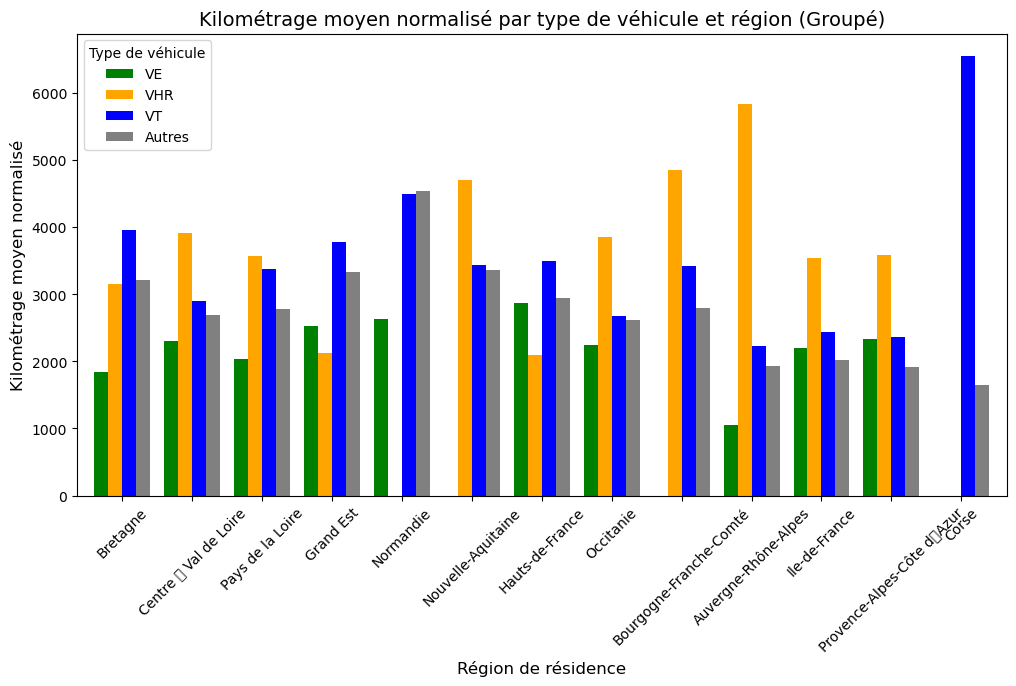

In [42]:
import matplotlib.pyplot as plt

# 1. Calcul du kilométrage moyen total par région
kilometrage_moyen_total = df_fusion.groupby('REG_res').apply(
    lambda x: (x['KVKM1ANV'] * x['pond_veh']).sum() / x['pond_veh'].sum()
)

# 2. Calcul du kilométrage moyen par région et type de véhicule
kilometrage_moyen_par_vehicule = df_fusion.groupby(['REG_res', 'energie_groupe']).apply(
    lambda x: (x['KVKM1ANV'] * x['pond_veh']).sum() / x['pond_veh'].sum()
).unstack()

# 3. Normaliser les valeurs : pour chaque région, ajuster la somme des segments à la moyenne totale
for region in kilometrage_moyen_par_vehicule.index:
    total_region = kilometrage_moyen_total[region]  # Moyenne totale pour cette région
    region_data = kilometrage_moyen_par_vehicule.loc[region]
    normalized_data = (region_data / region_data.sum()) * total_region
    kilometrage_moyen_par_vehicule.loc[region] = normalized_data

# 4. Trier les régions par leur moyenne totale (en ordre décroissant)
sorted_regions = kilometrage_moyen_total.sort_values(ascending=False).index

# Réorganiser les données de kilometrage_moyen_par_vehicule pour suivre l'ordre trié des régions
kilometrage_moyen_par_vehicule_sorted = kilometrage_moyen_par_vehicule.loc[sorted_regions]

# 5. Spécifier les couleurs dynamiquement en fonction de l'ordre des types de véhicules
column_order = ['VE', 'VHR', 'VT', 'Autres']  # Ordre des carburants

# Réorganiser les colonnes dans le bon ordre
kilometrage_moyen_par_vehicule_sorted = kilometrage_moyen_par_vehicule_sorted[column_order]

# Spécifier les couleurs pour chaque type de véhicule
colors = ['green', 'orange', 'blue', 'gray']  # VE (vert), VHR (orange), VT (bleu), Autres (gris)

# 6. Création de l'histogramme **groupé** (et non empilé)
ax = kilometrage_moyen_par_vehicule_sorted.plot(
    kind='bar', 
    stacked=False,  # ⚠️ Changer en False pour un histogramme groupé
    figsize=(12, 6), 
    color=colors, 
    width=0.8  # Ajustement pour éviter le chevauchement des barres
)

# 7. Ajouter des titres et des étiquettes
plt.title('Kilométrage moyen normalisé par type de véhicule et région (Groupé)', fontsize=14)
plt.xlabel('Région de résidence', fontsize=12)
plt.ylabel('Kilométrage moyen normalisé', fontsize=12)
plt.xticks(rotation=45)  # Rotation des noms de régions pour meilleure lisibilité

# 8. Afficher la légende et le graphique
plt.legend(title="Type de véhicule")
plt.show()


/tmp/ipykernel_4853/3302194506.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  kilometrage_moyen_total = df_fusion.groupby('critair').apply(
/tmp/ipykernel_4853/3302194506.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  kilometrage_moyen_par_vehicule = df_fusion.groupby(['critair', 'energie_groupe']).apply(


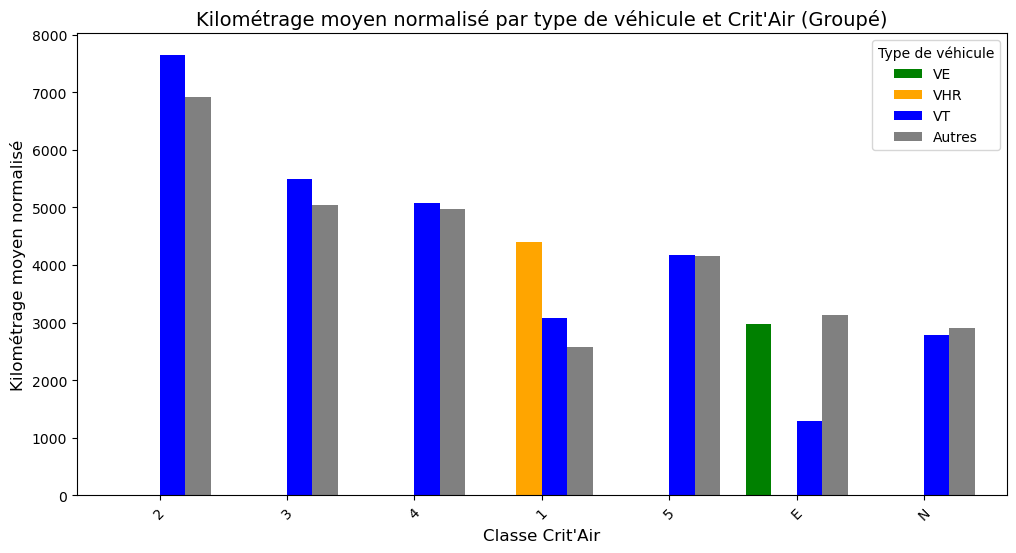

In [43]:
import matplotlib.pyplot as plt

# 1. Calcul du kilométrage moyen total par Crit'Air
kilometrage_moyen_total = df_fusion.groupby('critair').apply(
    lambda x: (x['KVKM1ANV'] * x['pond_veh']).sum() / x['pond_veh'].sum()
)

# 2. Calcul du kilométrage moyen par Crit'Air et type de véhicule
kilometrage_moyen_par_vehicule = df_fusion.groupby(['critair', 'energie_groupe']).apply(
    lambda x: (x['KVKM1ANV'] * x['pond_veh']).sum() / x['pond_veh'].sum()
).unstack()

# 3. Normaliser les valeurs : pour chaque Crit'Air, ajuster la somme des segments à la moyenne totale
for critair in kilometrage_moyen_par_vehicule.index:
    total_critair = kilometrage_moyen_total[critair]  # Moyenne totale pour cette catégorie Crit'Air
    critair_data = kilometrage_moyen_par_vehicule.loc[critair]
    normalized_data = (critair_data / critair_data.sum()) * total_critair
    kilometrage_moyen_par_vehicule.loc[critair] = normalized_data

# 4. Trier les catégories Crit'Air par leur moyenne totale (en ordre décroissant)
sorted_critair = kilometrage_moyen_total.sort_values(ascending=False).index

# Réorganiser les données de kilometrage_moyen_par_vehicule pour suivre l'ordre trié des catégories Crit'Air
kilometrage_moyen_par_vehicule_sorted = kilometrage_moyen_par_vehicule.loc[sorted_critair]

# 5. Spécifier les couleurs dynamiquement en fonction de l'ordre des types de véhicules
column_order = ['VE', 'VHR', 'VT', 'Autres']  # Ordre des carburants

# Réorganiser les colonnes dans le bon ordre
kilometrage_moyen_par_vehicule_sorted = kilometrage_moyen_par_vehicule_sorted[column_order]

# Spécifier les couleurs pour chaque type de véhicule
colors = ['green', 'orange', 'blue', 'gray']  # VE (vert), VHR (orange), VT (bleu), Autres (gris)

# 6. Création de l'histogramme **groupé** (et non empilé)
ax = kilometrage_moyen_par_vehicule_sorted.plot(
    kind='bar', 
    stacked=False,  # ⚠️ Changer en False pour un histogramme groupé
    figsize=(12, 6), 
    color=colors, 
    width=0.8  # Ajustement pour éviter le chevauchement des barres
)

# 7. Ajouter des titres et des étiquettes
plt.title('Kilométrage moyen normalisé par type de véhicule et Crit\'Air (Groupé)', fontsize=14)
plt.xlabel('Classe Crit\'Air', fontsize=12)
plt.ylabel('Kilométrage moyen normalisé', fontsize=12)
plt.xticks(rotation=45)  # Rotation des labels pour meilleure lisibilité

# 8. Afficher la légende et le graphique
plt.legend(title="Type de véhicule")
plt.show()


/tmp/ipykernel_4853/700674205.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  kilometrage_moyen_total = df_fusion.groupby('TYPMEN5').apply(
/tmp/ipykernel_4853/700674205.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  kilometrage_moyen_par_vehicule = df_fusion.groupby(['TYPMEN5', 'energie_groupe']).apply(


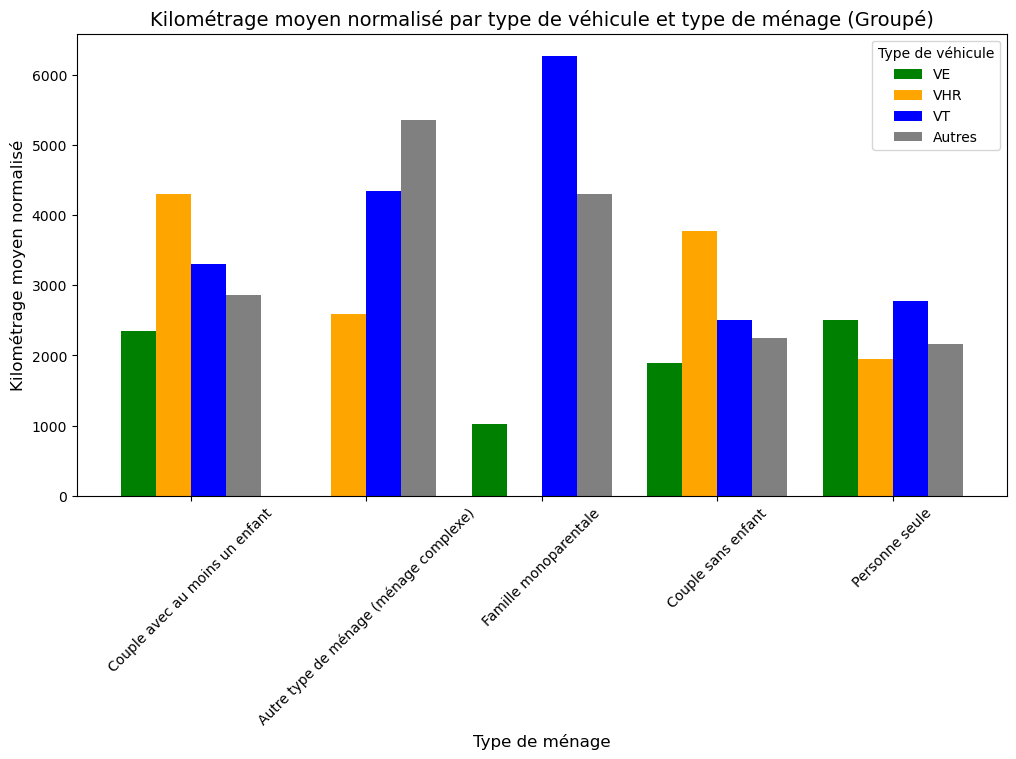

In [44]:
import matplotlib.pyplot as plt

# 1. Calcul du kilométrage moyen total par type de ménage
kilometrage_moyen_total = df_fusion.groupby('TYPMEN5').apply(
    lambda x: (x['KVKM1ANV'] * x['pond_veh']).sum() / x['pond_veh'].sum()
)

# 2. Calcul du kilométrage moyen par type de ménage et type de véhicule
kilometrage_moyen_par_vehicule = df_fusion.groupby(['TYPMEN5', 'energie_groupe']).apply(
    lambda x: (x['KVKM1ANV'] * x['pond_veh']).sum() / x['pond_veh'].sum()
).unstack()

# 3. Normaliser les valeurs : pour chaque type de ménage, ajuster la somme des segments à la moyenne totale
for typemen in kilometrage_moyen_par_vehicule.index:
    total_typemen = kilometrage_moyen_total[typemen]  # Moyenne totale pour cette catégorie de ménage
    typemen_data = kilometrage_moyen_par_vehicule.loc[typemen]
    normalized_data = (typemen_data / typemen_data.sum()) * total_typemen
    kilometrage_moyen_par_vehicule.loc[typemen] = normalized_data

# 4. Renommer les catégories de ménage
type_menage_labels = {
    1: 'Personne seule',
    2: 'Famille monoparentale',
    3: 'Couple sans enfant',
    4: 'Couple avec au moins un enfant',
    5: 'Autre type de ménage (ménage complexe)'
}

kilometrage_moyen_par_vehicule.rename(index=type_menage_labels, inplace=True)
kilometrage_moyen_total.rename(index=type_menage_labels, inplace=True)

# 5. Trier les types de ménages par leur moyenne totale (en ordre décroissant)
sorted_typemen = kilometrage_moyen_total.sort_values(ascending=False).index

# Réorganiser les données pour suivre l'ordre trié des types de ménages
kilometrage_moyen_par_vehicule_sorted = kilometrage_moyen_par_vehicule.loc[sorted_typemen]

# 6. Spécifier les couleurs pour chaque type de véhicule
column_order = ['VE', 'VHR', 'VT', 'Autres']  # Ordre des carburants
kilometrage_moyen_par_vehicule_sorted = kilometrage_moyen_par_vehicule_sorted[column_order]
colors = ['green', 'orange', 'blue', 'gray']  # VE (vert), VHR (orange), VT (bleu), Autres (gris)

# 7. Création de l'histogramme **groupé** (et non empilé)
ax = kilometrage_moyen_par_vehicule_sorted.plot(
    kind='bar',
    stacked=False,  # Groupé et non empilé
    figsize=(12, 6),
    color=colors,
    width=0.8  # Ajustement pour éviter le chevauchement des barres
)

# 8. Ajouter des titres et des étiquettes
plt.title('Kilométrage moyen normalisé par type de véhicule et type de ménage (Groupé)', fontsize=14)
plt.xlabel('Type de ménage', fontsize=12)
plt.ylabel('Kilométrage moyen normalisé', fontsize=12)
plt.xticks(rotation=45)  # Rotation des labels pour meilleure lisibilité

# 9. Afficher la légende et le graphique
plt.legend(title="Type de véhicule")
plt.show()


/tmp/ipykernel_4853/4041352676.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  kilometrage_moyen_total = df_fusion.groupby('DENSITECOM_RES').apply(
/tmp/ipykernel_4853/4041352676.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  kilometrage_moyen_par_vehicule = df_fusion.groupby(['DENSITECOM_RES', 'energie_groupe']).apply(


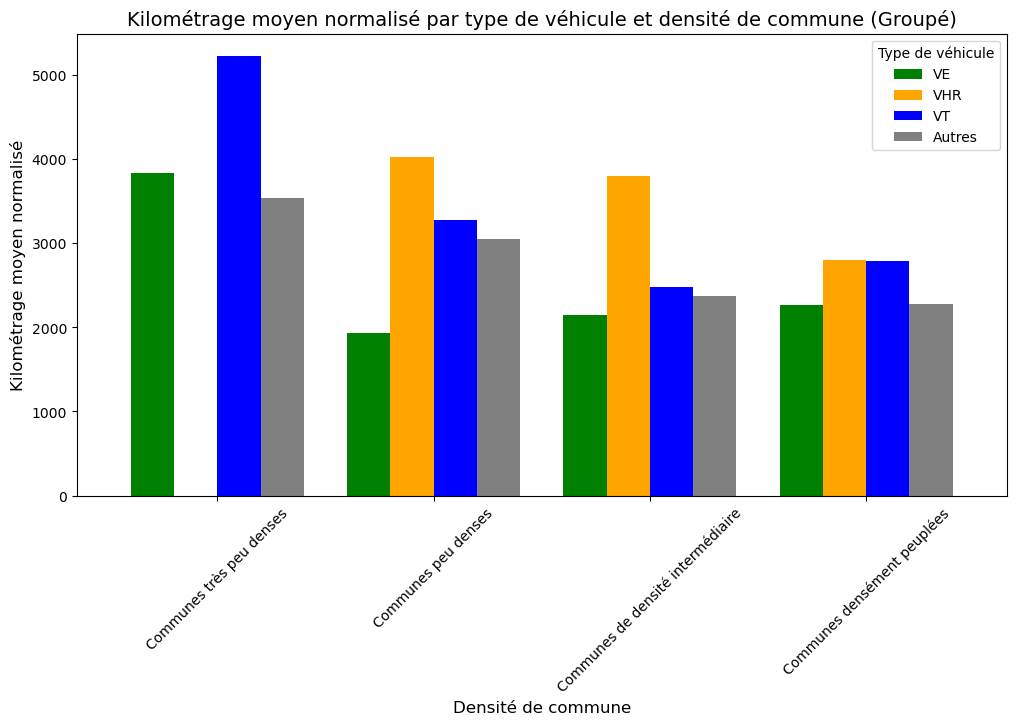

In [45]:
import matplotlib.pyplot as plt

# 1. Calcul du kilométrage moyen total par densité de commune
kilometrage_moyen_total = df_fusion.groupby('DENSITECOM_RES').apply(
    lambda x: (x['KVKM1ANV'] * x['pond_veh']).sum() / x['pond_veh'].sum()
)

# 2. Calcul du kilométrage moyen par densité de commune et type de véhicule
kilometrage_moyen_par_vehicule = df_fusion.groupby(['DENSITECOM_RES', 'energie_groupe']).apply(
    lambda x: (x['KVKM1ANV'] * x['pond_veh']).sum() / x['pond_veh'].sum()
).unstack()

# 3. Normaliser les valeurs : pour chaque densité de commune, ajuster la somme des segments à la moyenne totale
for densite in kilometrage_moyen_par_vehicule.index:
    total_densite = kilometrage_moyen_total[densite]  # Moyenne totale pour cette catégorie de densité
    densite_data = kilometrage_moyen_par_vehicule.loc[densite]
    normalized_data = (densite_data / densite_data.sum()) * total_densite
    kilometrage_moyen_par_vehicule.loc[densite] = normalized_data

# 4. Renommer les catégories de densité de communes
densite_labels = {
    1: 'Communes densément peuplées',
    2: 'Communes de densité intermédiaire',
    3: 'Communes peu denses',
    4: 'Communes très peu denses'
}

kilometrage_moyen_par_vehicule.rename(index=densite_labels, inplace=True)
kilometrage_moyen_total.rename(index=densite_labels, inplace=True)

# 5. Trier les catégories de densité par leur moyenne totale (en ordre décroissant)
sorted_densite = kilometrage_moyen_total.sort_values(ascending=False).index

# Réorganiser les données pour suivre l'ordre trié des densités de communes
kilometrage_moyen_par_vehicule_sorted = kilometrage_moyen_par_vehicule.loc[sorted_densite]

# 6. Spécifier les couleurs pour chaque type de véhicule
column_order = ['VE', 'VHR', 'VT', 'Autres']  # Ordre des carburants
kilometrage_moyen_par_vehicule_sorted = kilometrage_moyen_par_vehicule_sorted[column_order]
colors = ['green', 'orange', 'blue', 'gray']  # VE (vert), VHR (orange), VT (bleu), Autres (gris)

# 7. Création de l'histogramme **groupé** (et non empilé)
ax = kilometrage_moyen_par_vehicule_sorted.plot(
    kind='bar',
    stacked=False,  # Groupé et non empilé
    figsize=(12, 6),
    color=colors,
    width=0.8  # Ajustement pour éviter le chevauchement des barres
)

# 8. Ajouter des titres et des étiquettes
plt.title('Kilométrage moyen normalisé par type de véhicule et densité de commune (Groupé)', fontsize=14)
plt.xlabel('Densité de commune', fontsize=12)
plt.ylabel('Kilométrage moyen normalisé', fontsize=12)
plt.xticks(rotation=45)  # Rotation des labels pour meilleure lisibilité

# 9. Afficher la légende et le graphique
plt.legend(title="Type de véhicule")
plt.show()


/tmp/ipykernel_4853/3110955484.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  kilometrage_moyen_total = df_fusion.groupby('STATUTCOM_UU_RES').apply(
/tmp/ipykernel_4853/3110955484.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  kilometrage_moyen_par_vehicule = df_fusion.groupby(['STATUTCOM_UU_RES', 'energie_groupe']).apply(


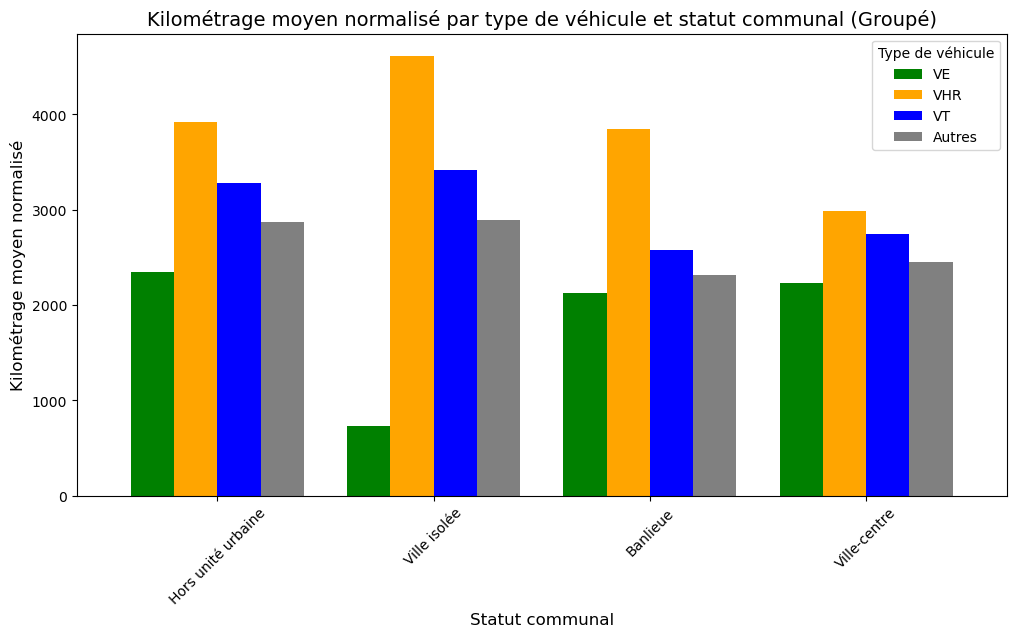

In [46]:
import matplotlib.pyplot as plt

# 1. Calcul du kilométrage moyen total par statut communal
kilometrage_moyen_total = df_fusion.groupby('STATUTCOM_UU_RES').apply(
    lambda x: (x['KVKM1ANV'] * x['pond_veh']).sum() / x['pond_veh'].sum()
)

# 2. Calcul du kilométrage moyen par statut communal et type de véhicule
kilometrage_moyen_par_vehicule = df_fusion.groupby(['STATUTCOM_UU_RES', 'energie_groupe']).apply(
    lambda x: (x['KVKM1ANV'] * x['pond_veh']).sum() / x['pond_veh'].sum()
).unstack()

# 3. Normaliser les valeurs : pour chaque statut communal, ajuster la somme des segments à la moyenne totale
for statut in kilometrage_moyen_par_vehicule.index:
    total_statut = kilometrage_moyen_total[statut]  # Moyenne totale pour cette catégorie
    statut_data = kilometrage_moyen_par_vehicule.loc[statut]
    normalized_data = (statut_data / statut_data.sum()) * total_statut
    kilometrage_moyen_par_vehicule.loc[statut] = normalized_data

# 4. Renommer les catégories de statut communal
statut_labels = {
    'B': 'Banlieue',
    'C': 'Ville-centre',
    'H': 'Hors unité urbaine',
    'I': 'Ville isolée'
}

kilometrage_moyen_par_vehicule.rename(index=statut_labels, inplace=True)
kilometrage_moyen_total.rename(index=statut_labels, inplace=True)

# 5. Trier les catégories de statut communal par leur moyenne totale (en ordre décroissant)
sorted_statut = kilometrage_moyen_total.sort_values(ascending=False).index

# Réorganiser les données pour suivre l'ordre trié des statuts communaux
kilometrage_moyen_par_vehicule_sorted = kilometrage_moyen_par_vehicule.loc[sorted_statut]

# 6. Spécifier les couleurs pour chaque type de véhicule
column_order = ['VE', 'VHR', 'VT', 'Autres']  # Ordre des carburants
kilometrage_moyen_par_vehicule_sorted = kilometrage_moyen_par_vehicule_sorted[column_order]
colors = ['green', 'orange', 'blue', 'gray']  # VE (vert), VHR (orange), VT (bleu), Autres (gris)

# 7. Création de l'histogramme **groupé** (et non empilé)
ax = kilometrage_moyen_par_vehicule_sorted.plot(
    kind='bar',
    stacked=False,  # Groupé et non empilé
    figsize=(12, 6),
    color=colors,
    width=0.8  # Ajustement pour éviter le chevauchement des barres
)

# 8. Ajouter des titres et des étiquettes
plt.title('Kilométrage moyen normalisé par type de véhicule et statut communal (Groupé)', fontsize=14)
plt.xlabel('Statut communal', fontsize=12)
plt.ylabel('Kilométrage moyen normalisé', fontsize=12)
plt.xticks(rotation=45)  # Rotation des labels pour meilleure lisibilité

# 9. Afficher la légende et le graphique
plt.legend(title="Type de véhicule")
plt.show()


/tmp/ipykernel_4853/3104528237.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  kilometrage_moyen_total = df_fusion.groupby('Pro_Perso').apply(
/tmp/ipykernel_4853/3104528237.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  kilometrage_moyen_par_vehicule = df_fusion.groupby(['Pro_Perso', 'energie_groupe']).apply(


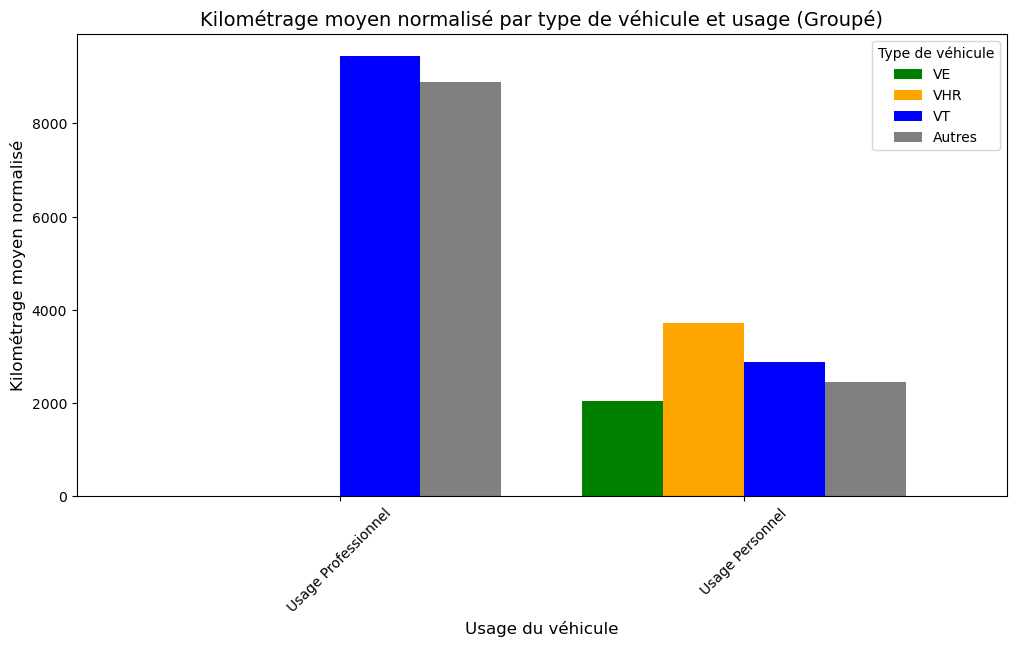

In [47]:
import matplotlib.pyplot as plt

# 1. Calcul du kilométrage moyen total par usage (Professionnel ou Personnel)
kilometrage_moyen_total = df_fusion.groupby('Pro_Perso').apply(
    lambda x: (x['KVKM1ANV'] * x['pond_veh']).sum() / x['pond_veh'].sum()
)

# 2. Calcul du kilométrage moyen par usage et type de véhicule
kilometrage_moyen_par_vehicule = df_fusion.groupby(['Pro_Perso', 'energie_groupe']).apply(
    lambda x: (x['KVKM1ANV'] * x['pond_veh']).sum() / x['pond_veh'].sum()
).unstack()

# 3. Normaliser les valeurs : pour chaque usage, ajuster la somme des segments à la moyenne totale
for usage in kilometrage_moyen_par_vehicule.index:
    total_usage = kilometrage_moyen_total[usage]  # Moyenne totale pour cet usage
    usage_data = kilometrage_moyen_par_vehicule.loc[usage]
    normalized_data = (usage_data / usage_data.sum()) * total_usage
    kilometrage_moyen_par_vehicule.loc[usage] = normalized_data

# 4. Renommer les catégories de Pro_Perso
usage_labels = {
    'Pro': 'Usage Professionnel',
    'Perso': 'Usage Personnel'
}

kilometrage_moyen_par_vehicule.rename(index=usage_labels, inplace=True)
kilometrage_moyen_total.rename(index=usage_labels, inplace=True)

# 5. Trier les catégories d’usage par leur moyenne totale (en ordre décroissant)
sorted_usage = kilometrage_moyen_total.sort_values(ascending=False).index

# Réorganiser les données pour suivre l'ordre trié des usages
kilometrage_moyen_par_vehicule_sorted = kilometrage_moyen_par_vehicule.loc[sorted_usage]

# 6. Spécifier les couleurs pour chaque type de véhicule
column_order = ['VE', 'VHR', 'VT', 'Autres']  # Ordre des carburants
kilometrage_moyen_par_vehicule_sorted = kilometrage_moyen_par_vehicule_sorted[column_order]
colors = ['green', 'orange', 'blue', 'gray']  # VE (vert), VHR (orange), VT (bleu), Autres (gris)

# 7. Création de l'histogramme **groupé** (et non empilé)
ax = kilometrage_moyen_par_vehicule_sorted.plot(
    kind='bar',
    stacked=False,  # Groupé et non empilé
    figsize=(12, 6),
    color=colors,
    width=0.8  # Ajustement pour éviter le chevauchement des barres
)

# 8. Ajouter des titres et des étiquettes
plt.title('Kilométrage moyen normalisé par type de véhicule et usage (Groupé)', fontsize=14)
plt.xlabel('Usage du véhicule', fontsize=12)
plt.ylabel('Kilométrage moyen normalisé', fontsize=12)
plt.xticks(rotation=45)  # Rotation des labels pour meilleure lisibilité

# 9. Afficher la légende et le graphique
plt.legend(title="Type de véhicule")
plt.show()


In [48]:
print(list(df_fusion.columns))

['IDENT_NUMVEH', 'IDENT_MEN', 'NUM_VEH', 'pond_veh', 'KVROUL', 'cylindree_fin', 'energie_fin', 'energie_agrege', 'hybride', 'energie_statinfo', 'energie_CritAir', 'critair', 'puis_fisc_fin', 'ANNEE_1mec', 'age', 'ANNEE_acq', 'dur_acq', 'KVAQUIV', 'KVAQUINO01', 'KVAQUINO02', 'KVAQUINO03', 'KVAQUINO04', 'KVAQUINO05', 'KVAQUINO06', 'KVAQUINO07', 'KVAQUINO08', 'KVAQUINO09', 'KVAQUINO10', 'KVAQUINO11', 'KVAQUINO12', 'KVAQUINO13', 'KVAQUINO14', 'KVAQUINO15', 'KVAQUINO16', 'KVAQUINO17', 'KVAQUINO18', 'KVAQUINO19', 'KVAQUINO20', 'KVAQUINO21', 'KVQUICONV01', 'KVQUICONV02', 'KVQUICONV03', 'KVQUICONV04', 'KVQUICONV05', 'KVQUICONV06', 'KVQUICONV07', 'KVQUICONV08', 'KVQUICONV09', 'KVQUICONV10', 'KVQUICONV11', 'KVQUICONV12', 'KVQUICONV13', 'KVQUICONV14', 'KVQUICONV15', 'KVQUICONV16', 'KVQUICONV17', 'KVQUICONV18', 'KVQUICONV19', 'KVQUICONV20', 'KVQUICONV21', 'KVQUI9COV', 'KVQUICONPV', 'KVKMV', 'indic_km_corr', 'KVKMVT', 'KVKM1ANV', 'indic_km_annu_corr', 'KVKM1ANVT', 'KVCONS', 'KVGAREJOUR', 'KVGARENUI

In [54]:
#Enregistrement de la base en csv en retenant uniquement les variables que l'on va retenir pour la regression lineaires

df_selected = df_fusion[['IDENT_NUMVEH', 'IDENT_MEN', 'NUM_VEH', 'pond_veh','cylindree_fin','critair','ANNEE_1mec', 'age','KVKM1ANV','KVCONS','energie_groupe','Pro_Perso','NEWTYPMEN','AGEPR','decile_rev','CSMEN','REG_res','STATUTCOM_UU_RES','pop_10min_voiture_train_res','DIPDETPR_REGROUPE',"NENFANTS","NENFHORS","NPERS"]]

# Enregistrer en CSV
df_selected.to_csv("donnees_selectionnees.csv", index=False)  # index=False pour ne pas sauvegarder l'index

In [50]:
print(df_selected['cylindree_fin'].isna().value_counts())

cylindree_fin
False    16588
True      1884
Name: count, dtype: int64


In [51]:
print(df_selected['KVCONS'].isna().value_counts())

KVCONS
False    14319
True      4153
Name: count, dtype: int64


Nouveau Plan d'analyse Benjamin : Sortir les stats descriptives pour les particuliers et VT pour comparer avec la base SDES


In [52]:
#On recupere la base des véhicules thermiques des particuliers
df_vt_part = df_fusion[
    (df_fusion["energie_groupe"] == "VT") &
    (df_fusion["Pro_Perso"] == "Perso")
]
#On affcihe la base 
df_vt_part.head()

,IDENT_NUMVEH,IDENT_MEN,NUM_VEH,pond_veh,KVROUL,cylindree_fin,energie_fin,energie_agrege,hybride,energie_statinfo,...,pop_10min_voiture_train_res,classement_littoral_res,classement_montagne_res,densite_7_RES,dist_res_tram,dist_res_metro,dist_res_train,dist_res_tgv,DIPDETPR_REGROUPE,NEWTYPMEN
0,110000011400001,1100000114000,1,1842.977077,1,1.6,ES,1.0,NaN,2.0,...,100,Non concerné,Non concerné,Grands centres urbains,10km et plus,10km et plus,500m Ã moins de 1km,20km et plus,BAC+2,Personne seule
1,110000011500001,1100000115000,1,1948.382441,1,1.6,GO,2.0,NaN,4.0,...,100,Non concerné,Non concerné,Grands centres urbains,10km et plus,10km et plus,Moins de 500m,20km et plus,CAP_BEP,Couple avec au moins un enfant
2,110000011500002,1100000115000,2,1948.382441,1,1.4,ES,1.0,NaN,2.0,...,100,Non concerné,Non concerné,Grands centres urbains,10km et plus,10km et plus,Moins de 500m,20km et plus,CAP_BEP,Couple avec au moins un enfant
3,110000011600001,1100000116000,1,833.453670,1,1.6,ES,1.0,NaN,2.0,...,100,Non concerné,Non concerné,Rural Ã habitat dispersÃ©,10km et plus,10km et plus,1 Ã moins de 2km,10 Ã moins de 20km,CAP_BEP,Couple sans enfant
4,110000012400001,1100000124000,1,1698.142782,1,1.5,GO,2.0,NaN,4.0,...,100,Non concerné,Non concerné,Grands centres urbains,10km et plus,10km et plus,500m Ã moins de 1km,20km et plus,BAC+5+,Couple sans enfant


Statistiques descriptives du nombre de kilomètres en fonction de la région pour les VT particuliers EMP 2019

In [53]:
# Calcul de la moyenne pondérée par région
def moyenne_ponderee(groupe):
    return (groupe["KVKM1ANV"] * groupe["pond_veh"]).sum() / groupe["pond_veh"].sum()

# Appliquer la fonction groupée par région
moyenne_ponderee_par_region = df_vt_part.groupby("REG_res").apply(moyenne_ponderee).reset_index()

# Renommer les colonnes
moyenne_ponderee_par_region.columns = ["Région", "Moyenne_Pondérée_Kilométrage"]

# Sauvegarde dans un fichier Excel
moyenne_ponderee_par_region.to_excel("moyenne_ponderee_kilometrage_par_region.xlsx", index=False)


/tmp/ipykernel_4853/520621754.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  moyenne_ponderee_par_region = df_vt_part.groupby("REG_res").apply(moyenne_ponderee).reset_index()
